In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/mutual-funds-india-detailed/comprehensive_mutual_funds_data.csv


In [2]:
mutual_fund_data = pd.read_csv("/kaggle/input/mutual-funds-india-detailed/comprehensive_mutual_funds_data.csv")

In [3]:
# df = Data frame where i create the copy of original datases

df = mutual_fund_data.copy()

# Data fields:

* Scheme Name: Name of the mutual fund scheme
* Min sip: Min sip amount required to start.
* Min lumpsum: Min lumpsum amount required to start.
* Expense ratio: calculated as a percentage of the Scheme's average Net Asset Value (NAV).
* Fund size: the total amount of money that a mutual fund manager must oversee and invest.
* Fund age: years since inception of scheme
* Fund manager: A fund manager is responsible for implementing a fund's investment strategy and managing its trading activities.
* Sortino : Sortino ratio measures the risk-adjusted return of an investment asset, portfolio, or strategy
* Alpha: Alpha is the excess returns relative to market benchmark for a given amount of risk taken by the scheme
* Standard deviation: A standard deviation is a number that can be used to show how much the returns of a mutual fund scheme are likely to deviate from its average annual returns.
* Beta: Beta in a mutual fund is often used to convey the fund's volatility (gains or losses) in relation to its respective benchmark index
* Sharpe: Sharpe Ratio of a mutual fund reveals its potential risk-adjusted returns
* Risk level:
1- Low risk
2- Low to moderate
3- Moderate
4- Moderately High
5- High
6- Very High
* AMC name: Mutual fund house managing the assets.
* Rating: 0-5 rating assigned to scheme
* Category: The category to which the mutual fund belongs (e.g. equity, debt, hybrid)
* Sub-category : It includes category like Small cap, Large cap, ELSS, etc.
* Return_1yr (%): The return percentage of the mutual fund scheme over 1 year.
* Return_3yr (%): The return percentage of the mutual fund scheme over 3 year.
* Return_5yr (%): The return percentage of the mutual fund scheme over 5year.

* Number of instances: The dataset contains data on hundreds of mutual funds available in India.
* Data source: The dataset was created by web scraping data from online websites

Disclaimer: The dataset is for educational and research purposes only. The data may not be 100% accurate and users should verify the data before making any investment decisions.

In [4]:
df.sample(3)

scheme_name  min_sip  min_lumpsum  \
2    Aditya Birla SL Asset Allocator FoF-Dir Growth     1000         1000   
731                        Tata Mid Cap Growth Fund      150         5000   
16                   Aditya Birla SL Flexi Cap Fund      100          100   

     expense_ratio  fund_size_cr  fund_age_yr           fund_manager sortino  \
2             0.53         157.0           10     Vinod Narayan Bhat    3.44   
731           0.98        1759.0           10  Satish Chandra Mishra     3.3   
16            0.86       15449.0           10              Anil Shah     3.4   

     alpha     sd  beta sharpe  risk_level                           amc_name  \
2     2.67  10.58  0.67   1.42           5  Aditya Birla Sun Life Mutual Fund   
731   0.16  15.94  0.87   1.61           6                   Tata Mutual Fund   
16   -1.46   16.6  0.96   1.27           6  Aditya Birla Sun Life Mutual Fund   

     rating category          sub_category  returns_1yr  returns_3yr  \
2         3    Other         FoFs Domestic          2.0         18.9   
731       3   Equity  Mid Cap Mutual Funds          1.3         29.2   
16        3   Equity       Flexi Cap Funds         -2.1         25.0   

     returns_5yr  
2            9.7  
731         13.5  
16          10.4

# Data Processing

In [5]:
df.columns = df.columns.str.title()

df.columns

Index(['Scheme_Name', 'Min_Sip', 'Min_Lumpsum', 'Expense_Ratio',
       'Fund_Size_Cr', 'Fund_Age_Yr', 'Fund_Manager', 'Sortino', 'Alpha', 'Sd',
       'Beta', 'Sharpe', 'Risk_Level', 'Amc_Name', 'Rating', 'Category',
       'Sub_Category', 'Returns_1Yr', 'Returns_3Yr', 'Returns_5Yr'],
      dtype='object')

In [6]:
df.shape

(814, 20)

In [7]:
null_col = df.isnull().sum()
null_col = null_col.loc[null_col.values > 0].reset_index()
null_col

index    0
0  Returns_3Yr   21
1  Returns_5Yr  167

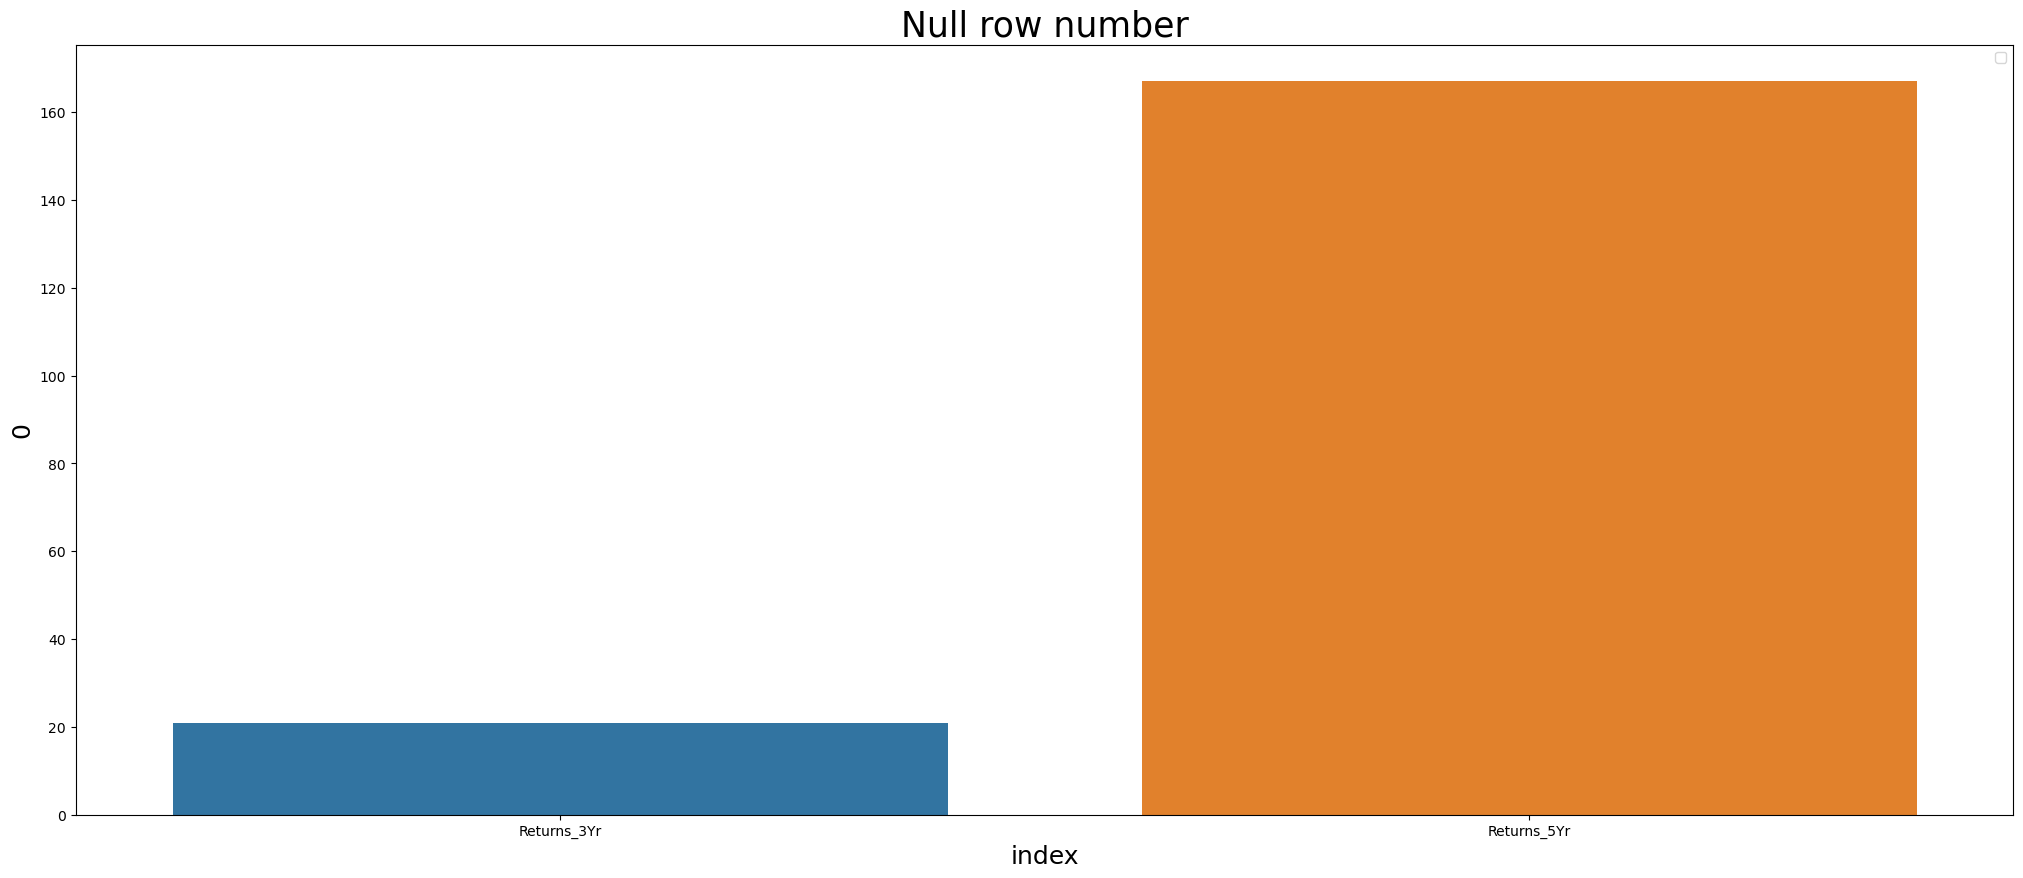

In [8]:
plt.figure(figsize=(25,10))

plt.title("Null row number", fontsize=25)
plt.xlabel("Columns", fontsize=18)
plt.ylabel("Count", fontsize=18)

sns.barplot(data = null_col, x='index', y=0)
plt.legend()

In [9]:
plt.figure(figsize=(25,10))
def create_null_graph():

    
    plt.title('Checking the Null Values')

    return sns.heatmap(df.isnull())

<Figure size 2500x1000 with 0 Axes>

<Axes: title={'center': 'Checking the Null Values'}>

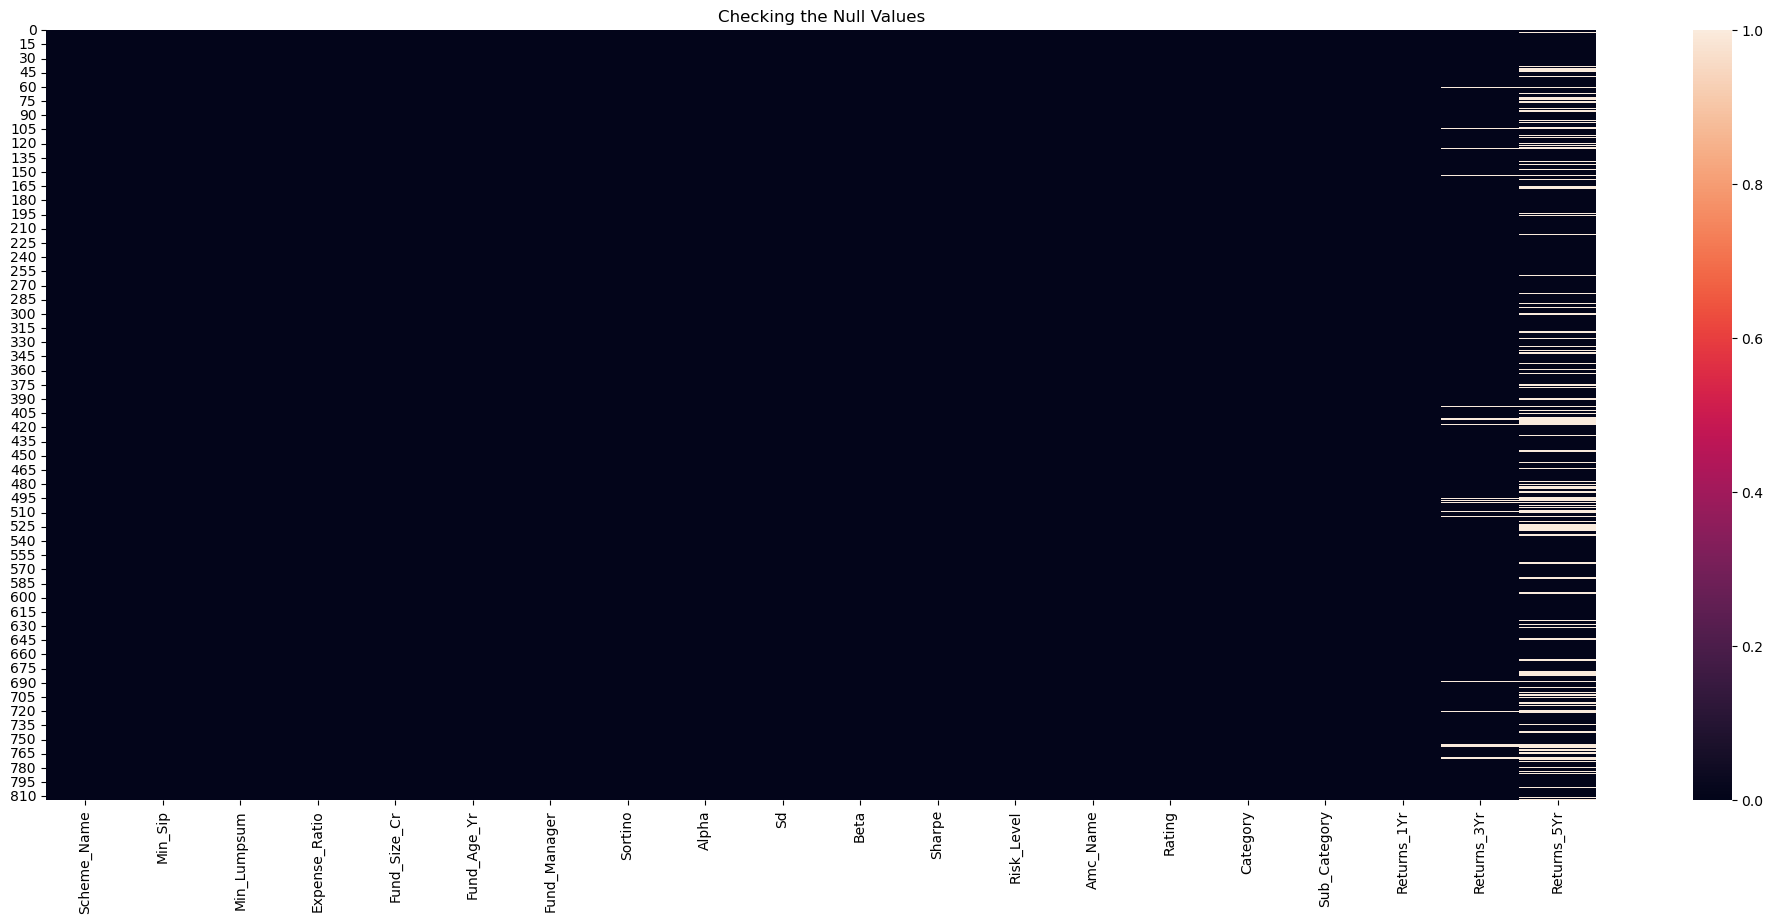

In [10]:
plt.figure(figsize=(25,10))
create_null_graph()

# Result:

* There is only 2 Columns which are Return_3Y and Return_5Y have null values.

In [11]:
df['Returns_3Yr'] = df['Returns_3Yr'].fillna(0)
df['Returns_5Yr'] = df['Returns_5Yr'].fillna(0)

In [12]:
df.isnull().sum()

Scheme_Name      0
Min_Sip          0
Min_Lumpsum      0
Expense_Ratio    0
Fund_Size_Cr     0
Fund_Age_Yr      0
Fund_Manager     0
Sortino          0
Alpha            0
Sd               0
Beta             0
Sharpe           0
Risk_Level       0
Amc_Name         0
Rating           0
Category         0
Sub_Category     0
Returns_1Yr      0
Returns_3Yr      0
Returns_5Yr      0
dtype: int64

<Axes: title={'center': 'Checking the Null Values'}>

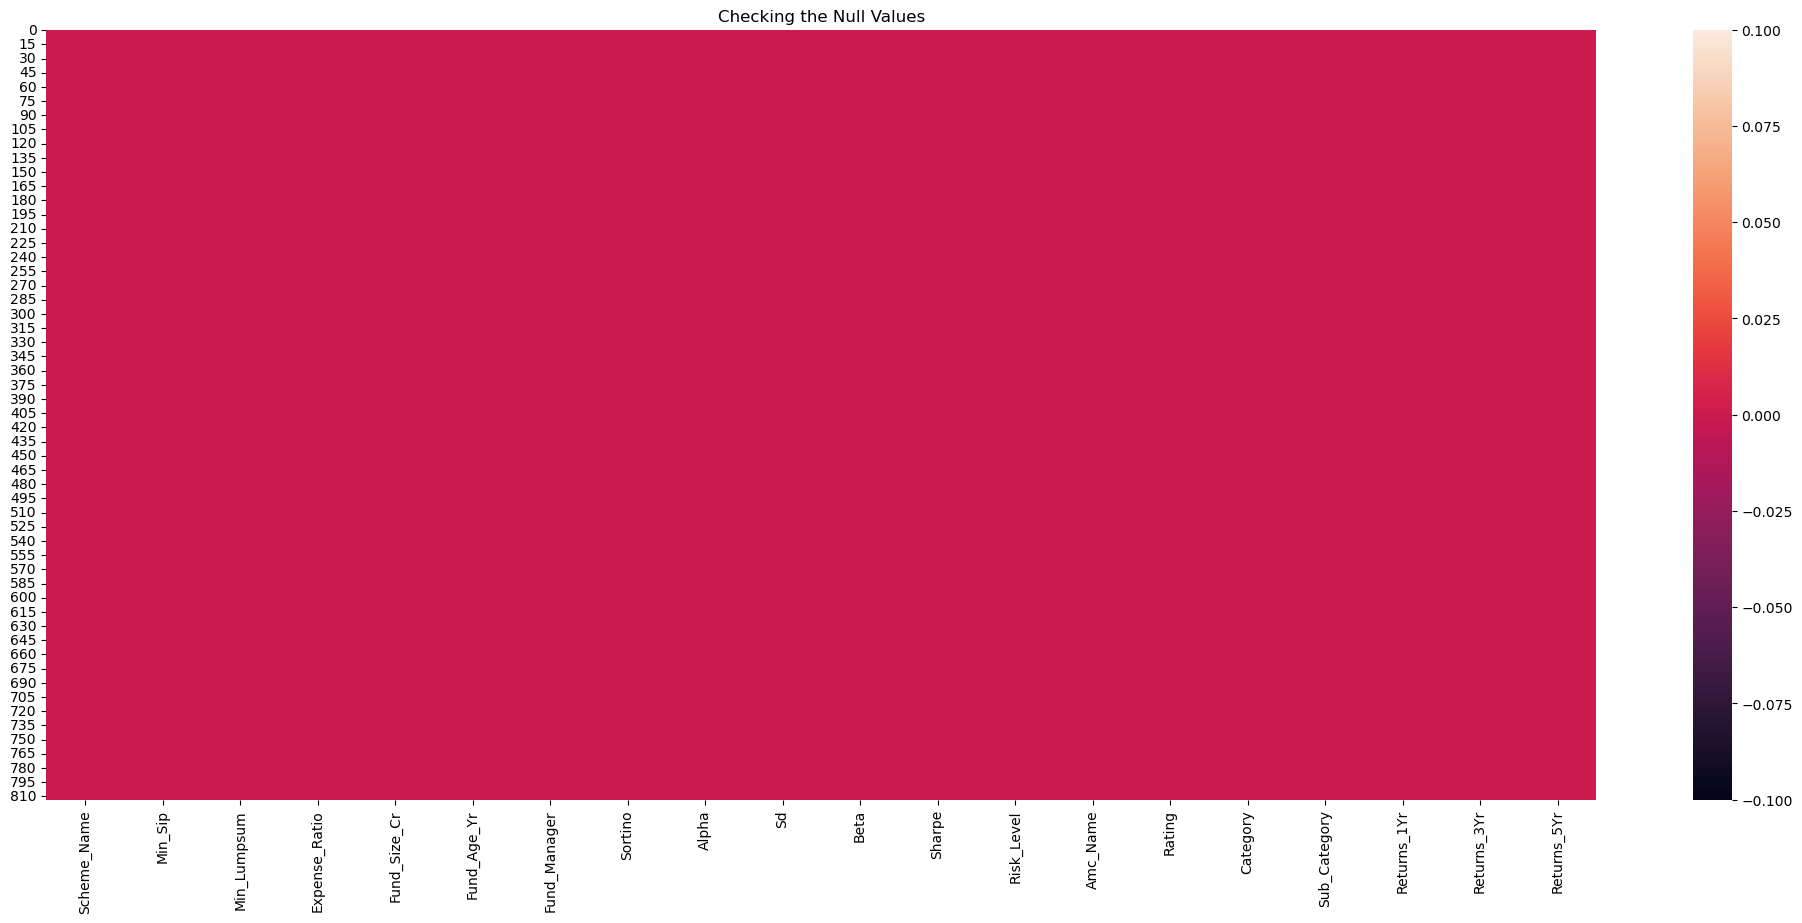

In [13]:
plt.figure(figsize=(25,10))
create_null_graph()

* Now, The Datasets has been cleaned.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Scheme_Name    814 non-null    object 
 1   Min_Sip        814 non-null    int64  
 2   Min_Lumpsum    814 non-null    int64  
 3   Expense_Ratio  814 non-null    float64
 4   Fund_Size_Cr   814 non-null    float64
 5   Fund_Age_Yr    814 non-null    int64  
 6   Fund_Manager   814 non-null    object 
 7   Sortino        814 non-null    object 
 8   Alpha          814 non-null    object 
 9   Sd             814 non-null    object 
 10  Beta           814 non-null    object 
 11  Sharpe         814 non-null    object 
 12  Risk_Level     814 non-null    int64  
 13  Amc_Name       814 non-null    object 
 14  Rating         814 non-null    int64  
 15  Category       814 non-null    object 
 16  Sub_Category   814 non-null    object 
 17  Returns_1Yr    814 non-null    float64
 18  Returns_3Y

In [15]:
df = df.drop(columns=['Sortino', 'Alpha', 'Sd','Beta','Sharpe'], axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Scheme_Name    814 non-null    object 
 1   Min_Sip        814 non-null    int64  
 2   Min_Lumpsum    814 non-null    int64  
 3   Expense_Ratio  814 non-null    float64
 4   Fund_Size_Cr   814 non-null    float64
 5   Fund_Age_Yr    814 non-null    int64  
 6   Fund_Manager   814 non-null    object 
 7   Risk_Level     814 non-null    int64  
 8   Amc_Name       814 non-null    object 
 9   Rating         814 non-null    int64  
 10  Category       814 non-null    object 
 11  Sub_Category   814 non-null    object 
 12  Returns_1Yr    814 non-null    float64
 13  Returns_3Yr    814 non-null    float64
 14  Returns_5Yr    814 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 95.5+ KB


In [17]:
data_type = df.dtypes.value_counts()
data_type

object     5
int64      5
float64    5
dtype: int64

<Axes: title={'center': 'Check Columns DataTypes'}, xlabel='DataTypes', ylabel='Count'>

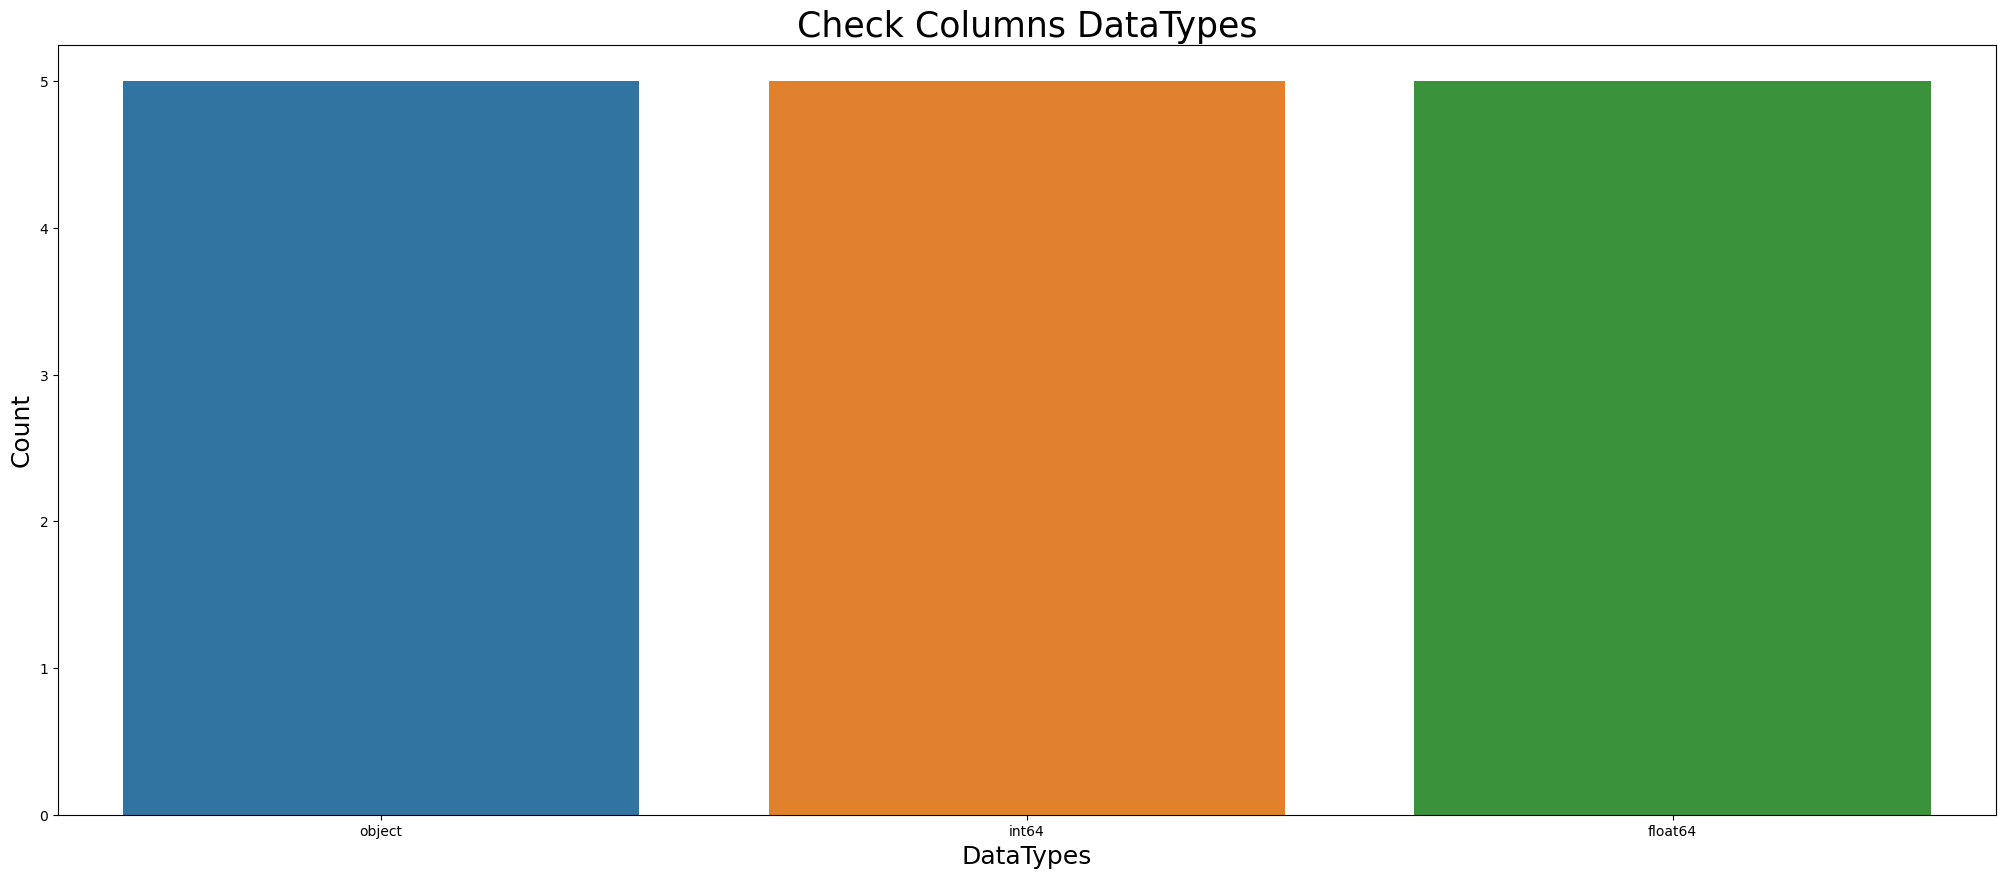

In [18]:
plt.figure(figsize=(25,10))
plt.title("Check Columns DataTypes", fontsize= 25)
plt.xlabel("DataTypes", fontsize= 18)
plt.ylabel("Count", fontsize= 18)


sns.barplot(x=data_type.index, y=data_type.values)

In [19]:
df.sample(5)

Scheme_Name  Min_Sip  Min_Lumpsum  Expense_Ratio  \
763       Union Flexi Cap Fund      500         1000           1.06   
445  Kotak Focused Equity Fund     1000         5000           0.51   
592     PGIM India Liquid Fund     1000          100           0.17   
702    Sundaram Multi Cap Fund        0         5000           0.79   
766        Union Largecap Fund     1000         1000           1.80   

     Fund_Size_Cr  Fund_Age_Yr      Fund_Manager  Risk_Level  \
763        1337.0           10  Sanjay Bembalkar           6   
445        2447.0            4    Shibani Kurian           6   
592         809.0           10        Puneet Pal           2   
702          84.0            5    Rohit Seksaria           6   
766         230.0            6      Hardick Bora           6   

                       Amc_Name  Rating Category            Sub_Category  \
763           Union Mutual Fund       4   Equity         Flexi Cap Funds   
445  Kotak Mahindra Mutual Fund       3   Equity           Focused Funds   
592      PGIM India Mutual Fund       3     Debt     Liquid Mutual Funds   
702        Sundaram Mutual Fund       0   Equity         Multi Cap Funds   
766           Union Mutual Fund       2   Equity  Large Cap Mutual Funds   

     Returns_1Yr  Returns_3Yr  Returns_5Yr  
763          0.6         27.7         12.9  
445          0.5         26.6          0.0  
592          5.6          4.4          5.4  
702          1.5         25.0          0.0  
766          0.1         24.3          9.9

# EDA Analysis:

# Categorization Analysis:

* Explore the performance of different fund categories (Equity, Debt, Hybrid) and sub-categories (Small Cap, Medium Duration, etc.).
* Identify which categories have shown the best and worst returns.

In [20]:
df.columns

Index(['Scheme_Name', 'Min_Sip', 'Min_Lumpsum', 'Expense_Ratio',
       'Fund_Size_Cr', 'Fund_Age_Yr', 'Fund_Manager', 'Risk_Level', 'Amc_Name',
       'Rating', 'Category', 'Sub_Category', 'Returns_1Yr', 'Returns_3Yr',
       'Returns_5Yr'],
      dtype='object')

<Axes: title={'center': 'Categorization Analysis'}, xlabel='Category', ylabel='count'>

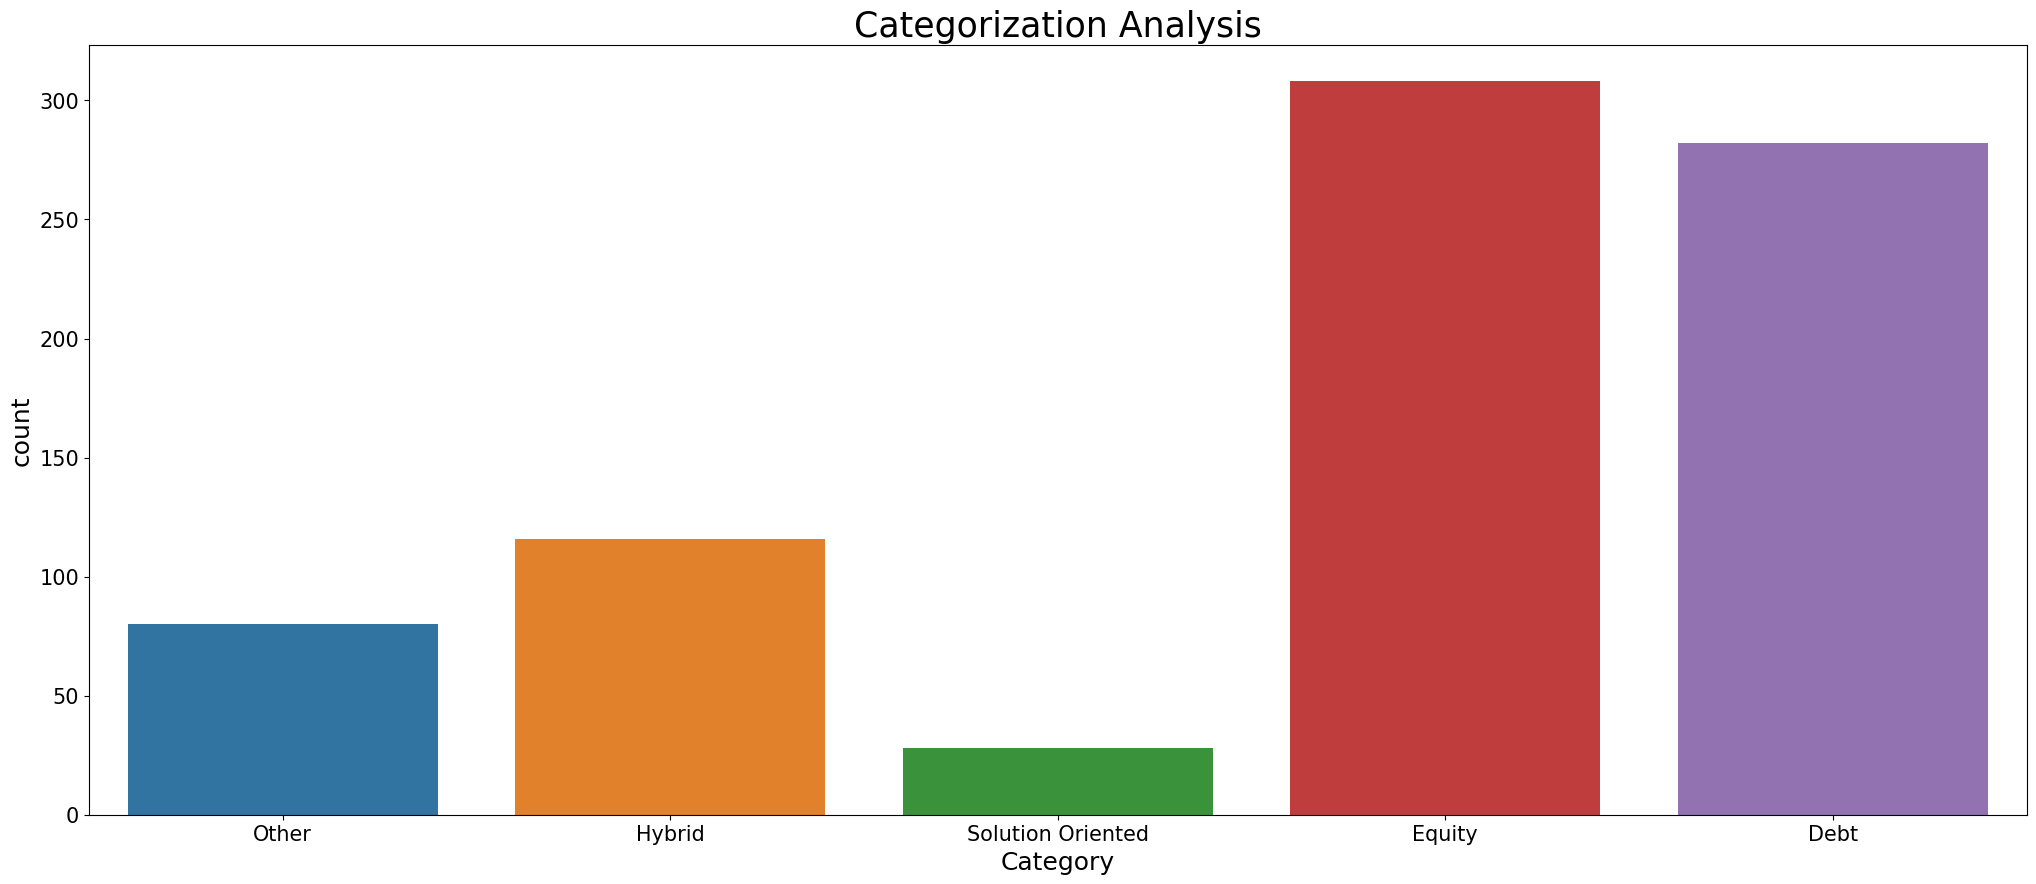

In [21]:
plt.figure(figsize=(25,10))
plt.title("Categorization Analysis", fontsize=25)
plt.xlabel('d', fontsize=18)
plt.ylabel('d', fontsize=18)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)


sns.countplot(x=df['Category'])

<Axes: title={'center': 'Sub_Category'}, xlabel='Sub_Category', ylabel='count'>

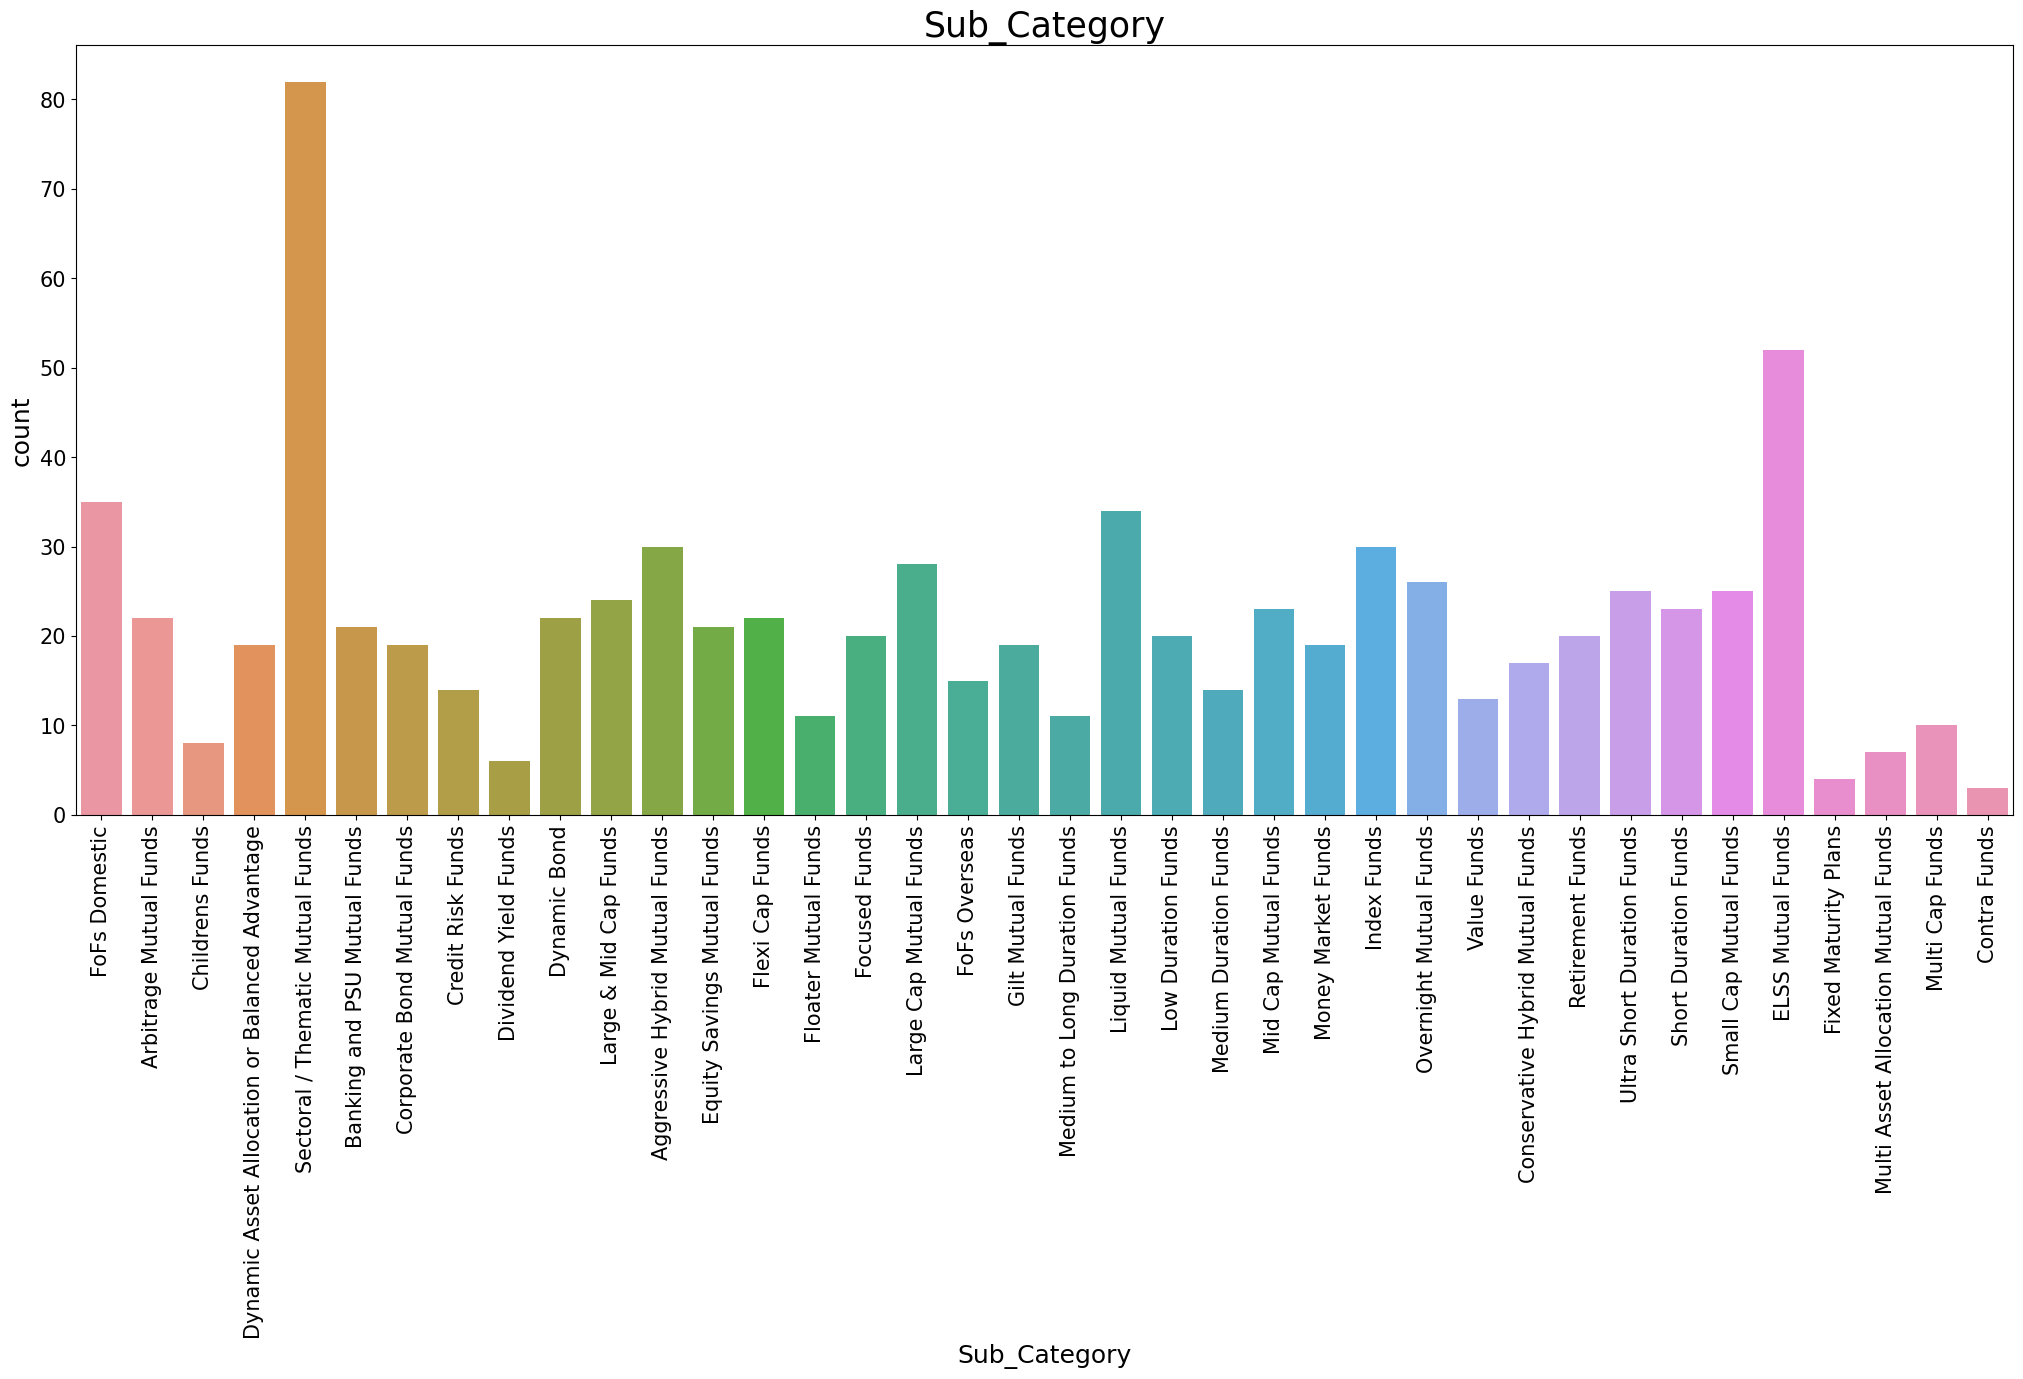

In [22]:
plt.figure(figsize=(25,10))
plt.title("Sub_Category", fontsize=25)
plt.xlabel(' ', fontsize=18)
plt.ylabel(' ', fontsize=18)
plt.xticks( rotation=90, fontsize=15)
plt.yticks( fontsize=15)


sns.countplot(x=df['Sub_Category'])

# Average fund returns

In [23]:
year_1 = df.groupby('Category')['Returns_1Yr'].mean()
year_3 = df.groupby('Category')['Returns_3Yr'].mean()
year_5 = df.groupby('Category')['Returns_5Yr'].mean()

In [24]:
year_1

Category
Debt                 5.547872
Equity               2.842532
Hybrid               4.075000
Other                2.891250
Solution Oriented    1.714286
Name: Returns_1Yr, dtype: float64

In [25]:
year_3

Category
Debt                  5.808865
Equity               29.641558
Hybrid               15.272414
Other                20.532500
Solution Oriented    18.167857
Name: Returns_3Yr, dtype: float64

In [26]:
year_5

Category
Debt                  4.823050
Equity               10.110390
Hybrid                7.027586
Other                 8.568750
Solution Oriented     5.917857
Name: Returns_5Yr, dtype: float64

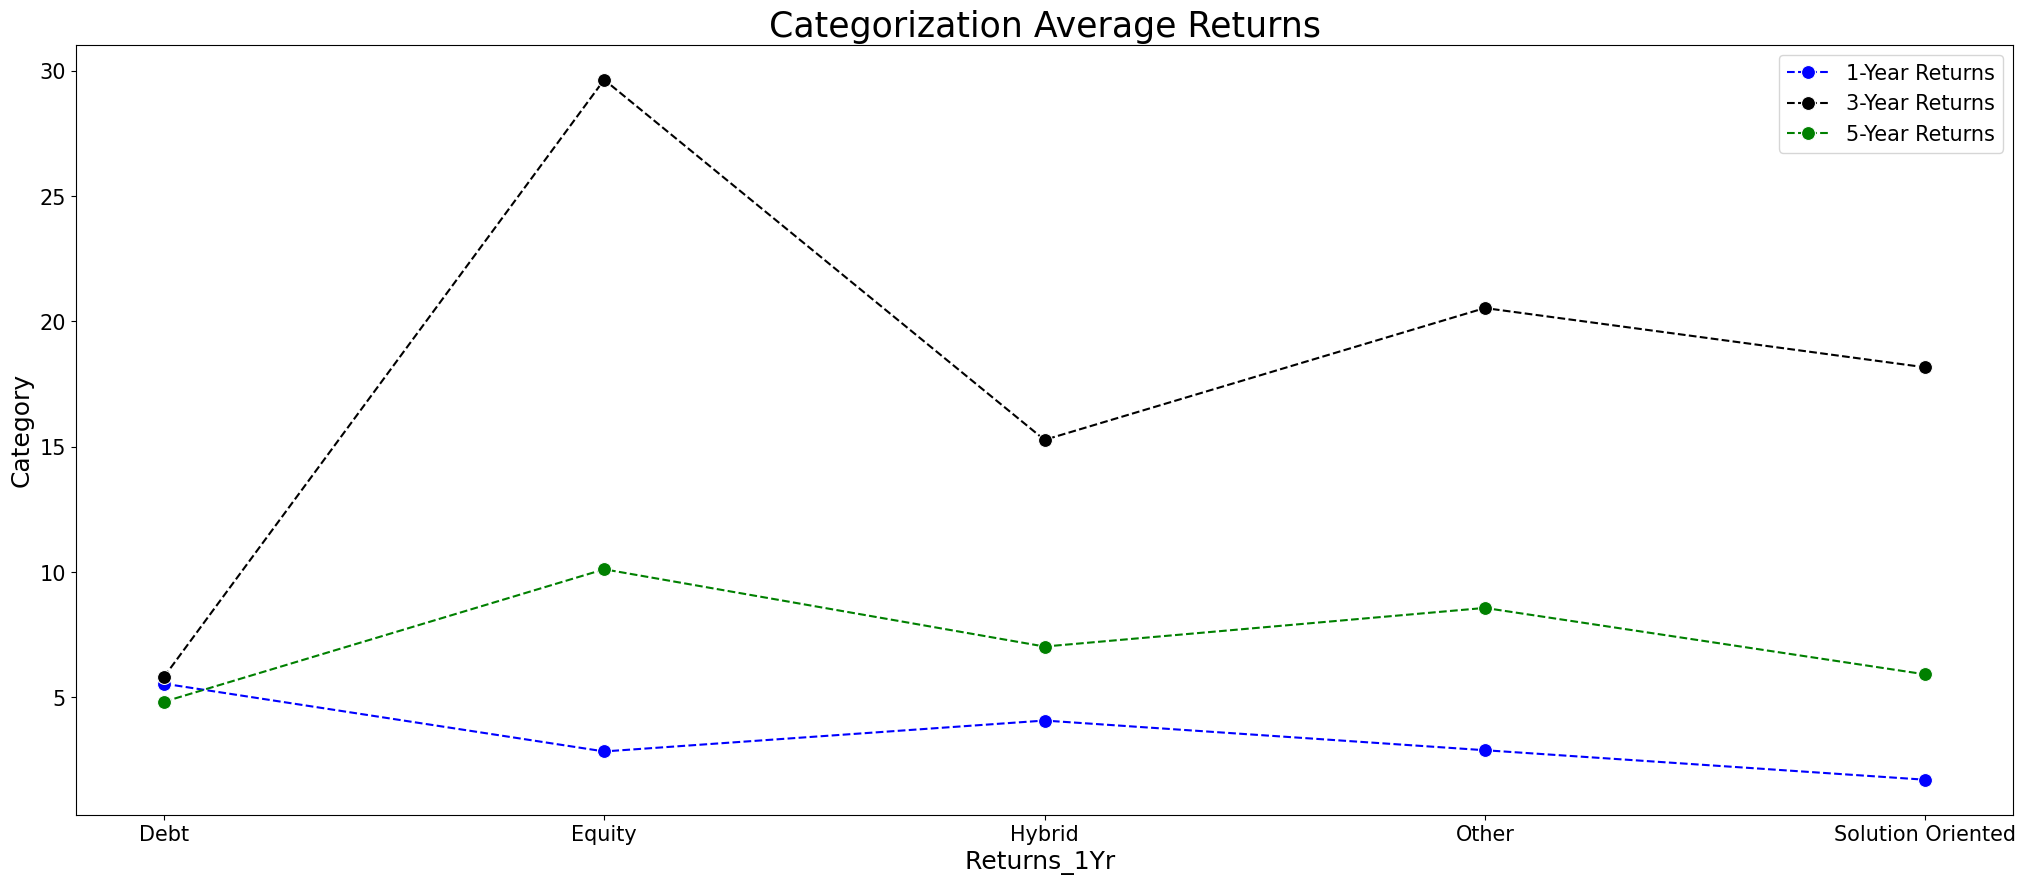

In [27]:
plt.figure(figsize=(25,10))
plt.title("Categorization Average Returns", fontsize=25)
plt.xlabel('Returns_1Yr ', fontsize=18)
plt.ylabel('Category', fontsize=18)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)


sns.lineplot(x=year_1.index,y=year_1.values,label='1-Year Returns', color='b', marker='o', linestyle='--', markersize=10)
sns.lineplot(x=year_3.index,y=year_3.values,label='3-Year Returns', color='black', marker='o', linestyle='--', markersize=10)
sns.lineplot(x=year_5.index,y=year_5.values,label='5-Year Returns', color='g', marker='o', linestyle='--', markersize=10)


plt.legend(fontsize=15)

# Result:
* for 1 year Debt and Hybrid fund perfomance well.
* for 3 year Equity fund perfomance would be great.
Similarly,
* for 5 year Equity fund perfomance would be great but all are okay in the term of returns.

In [28]:
year_1df = df.groupby('Sub_Category')['Returns_1Yr'].mean()
year_3df = df.groupby('Sub_Category')['Returns_3Yr'].mean()
year_5df = df.groupby('Sub_Category')['Returns_5Yr'].mean()

In [29]:
year_1df

Sub_Category
Aggressive Hybrid Mutual Funds                     2.450000
Arbitrage Mutual Funds                             5.363636
Banking and PSU Mutual Funds                       4.257143
Childrens Funds                                    0.462500
Conservative Hybrid Mutual Funds                   5.247059
Contra Funds                                       8.366667
Corporate Bond Mutual Funds                        3.984211
Credit Risk Funds                                 14.421429
Dividend Yield Funds                               4.133333
Dynamic Asset Allocation or Balanced Advantage     4.342105
Dynamic Bond                                       4.727273
ELSS Mutual Funds                                  1.426923
Equity Savings Mutual Funds                        3.561905
Fixed Maturity Plans                               7.900000
Flexi Cap Funds                                    0.286364
Floater Mutual Funds                               5.318182
FoFs Domestic              

In [30]:
year_3df

Sub_Category
Aggressive Hybrid Mutual Funds                    23.223333
Arbitrage Mutual Funds                             4.418182
Banking and PSU Mutual Funds                       5.228571
Childrens Funds                                   20.650000
Conservative Hybrid Mutual Funds                  11.511765
Contra Funds                                      33.566667
Corporate Bond Mutual Funds                        7.542105
Credit Risk Funds                                  8.328571
Dividend Yield Funds                              30.700000
Dynamic Asset Allocation or Balanced Advantage    16.036842
Dynamic Bond                                       7.045455
ELSS Mutual Funds                                 29.517308
Equity Savings Mutual Funds                       14.147619
Fixed Maturity Plans                              10.350000
Flexi Cap Funds                                   26.363636
Floater Mutual Funds                               4.118182
FoFs Domestic              

In [31]:
year_5df

Sub_Category
Aggressive Hybrid Mutual Funds                     9.126667
Arbitrage Mutual Funds                             4.036364
Banking and PSU Mutual Funds                       5.300000
Childrens Funds                                    8.512500
Conservative Hybrid Mutual Funds                   7.341176
Contra Funds                                      14.033333
Corporate Bond Mutual Funds                        5.447368
Credit Risk Funds                                  4.785714
Dividend Yield Funds                               9.933333
Dynamic Asset Allocation or Balanced Advantage     6.373684
Dynamic Bond                                       6.245455
ELSS Mutual Funds                                 10.188462
Equity Savings Mutual Funds                        5.771429
Fixed Maturity Plans                               7.000000
Flexi Cap Funds                                   10.363636
Floater Mutual Funds                               3.109091
FoFs Domestic              

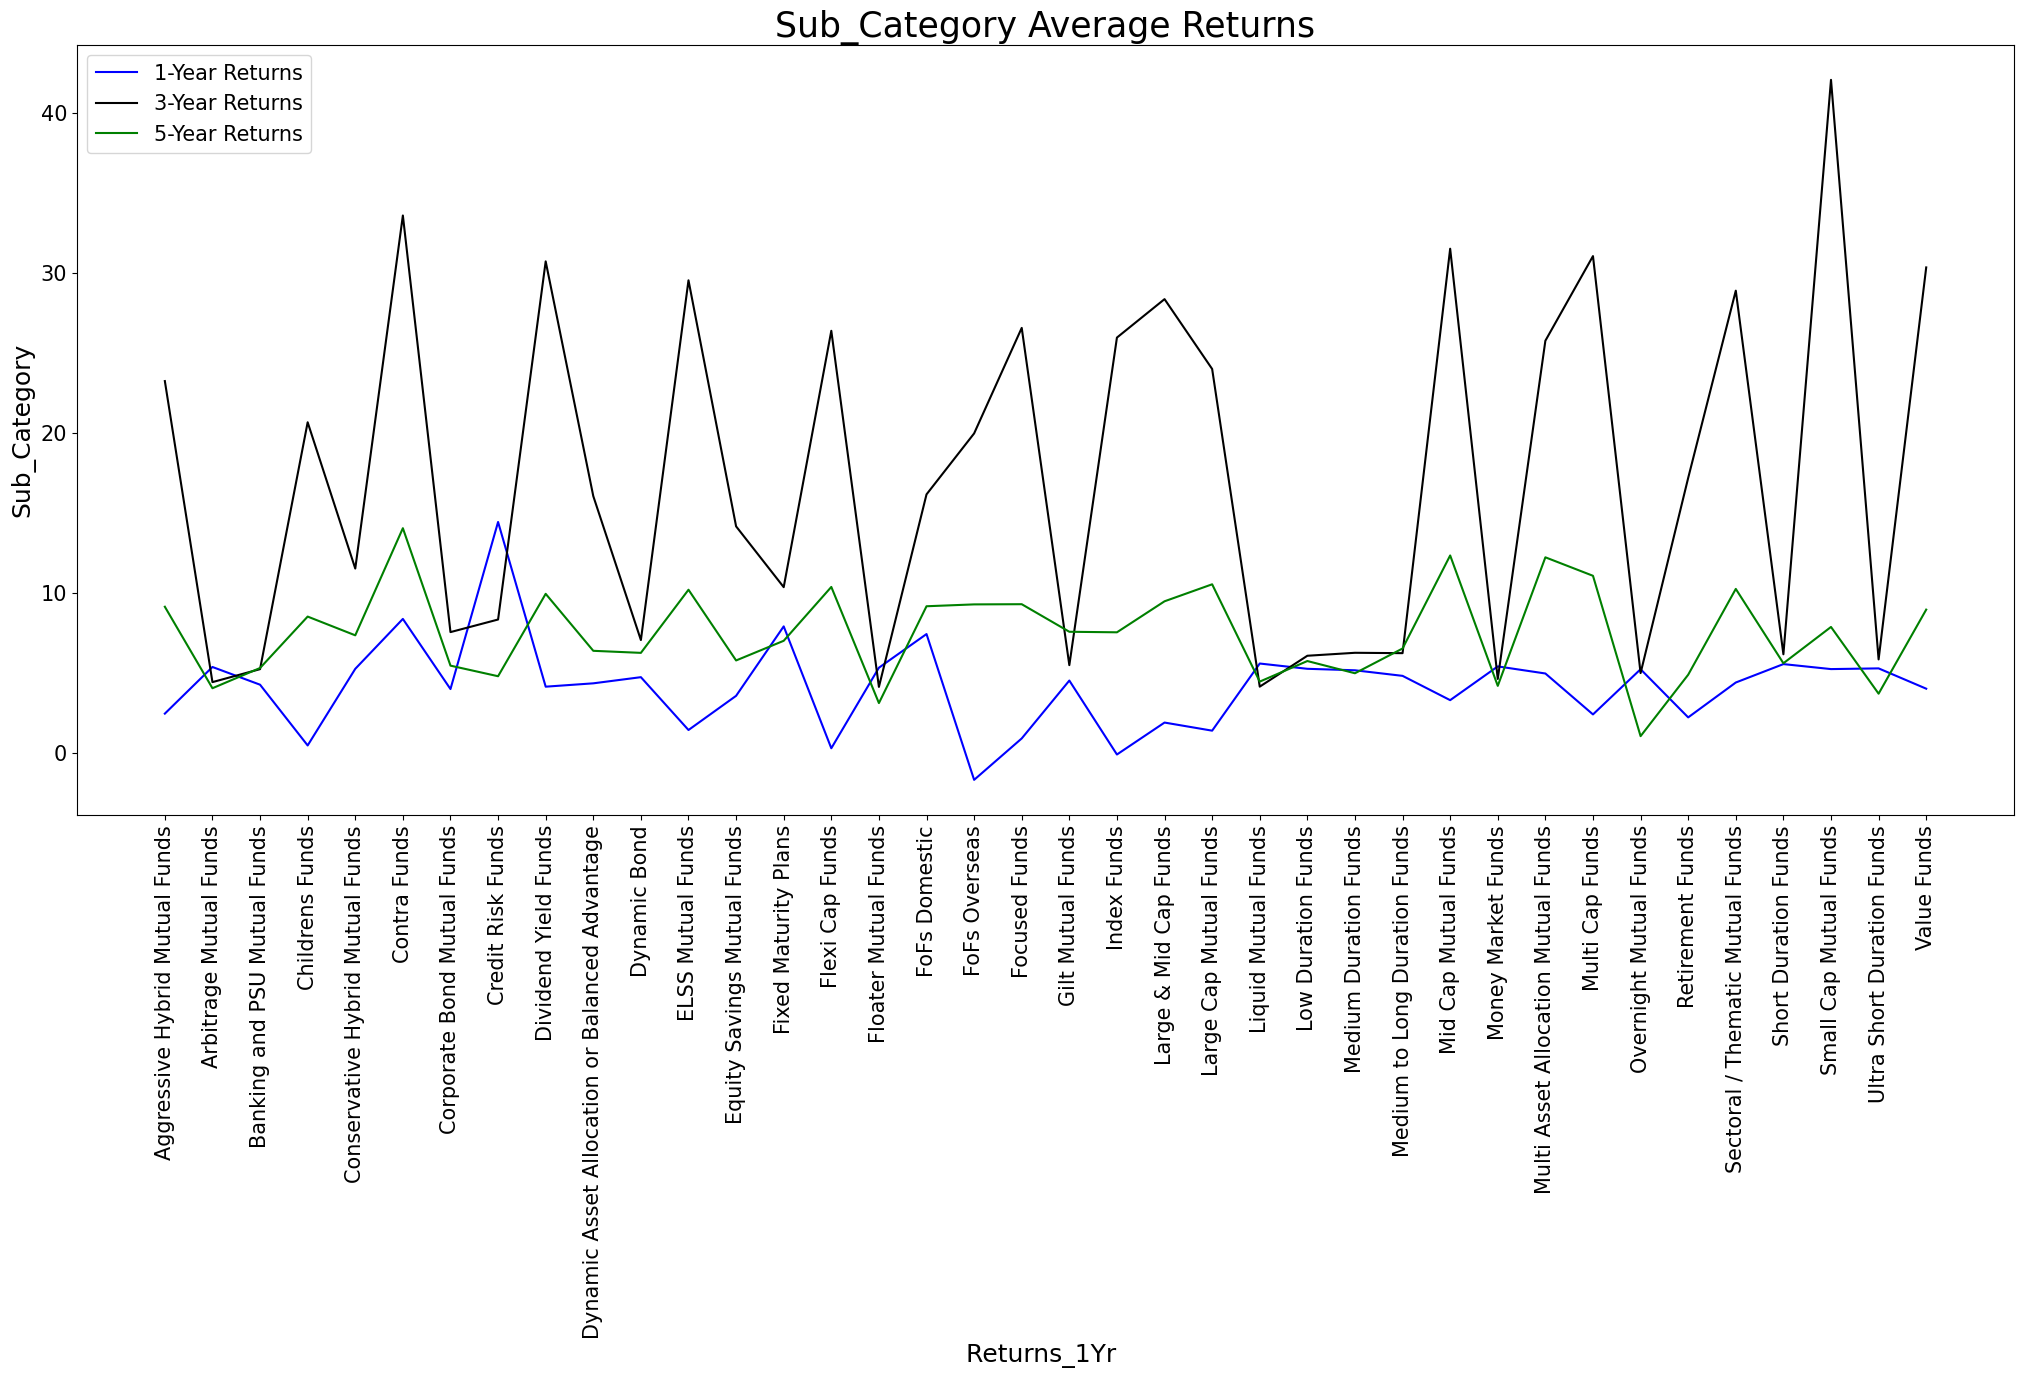

In [32]:
plt.figure(figsize=(25,10))
plt.title("Sub_Category Average Returns", fontsize=25)
plt.xlabel('Returns_1Yr ', fontsize=18)
plt.ylabel('Sub_Category', fontsize=18)
plt.xticks( rotation=90, fontsize=15)
plt.yticks( fontsize=15)


sns.lineplot(x=year_1df.index,y=year_1df.values,label='1-Year Returns', color='b')
sns.lineplot(x=year_3df.index,y=year_3df.values,label='3-Year Returns', color='black')
sns.lineplot(x=year_5df.index,y=year_5df.values,label='5-Year Returns', color='g')


plt.legend(fontsize=15)

# Worst fund return 

In [33]:
min_year_1 = df.groupby('Category')['Returns_1Yr'].min()
min_year_3 = df.groupby('Category')['Returns_3Yr'].min()
min_year_5 = df.groupby('Category')['Returns_5Yr'].min()

In [34]:
min_year_1

Category
Debt                  1.6
Equity              -19.7
Hybrid               -5.7
Other               -12.1
Solution Oriented    -6.5
Name: Returns_1Yr, dtype: float64

In [35]:
min_year_3

Category
Debt                 0.0
Equity               0.0
Hybrid               3.3
Other                0.0
Solution Oriented    4.6
Name: Returns_3Yr, dtype: float64

In [36]:
min_year_5

Category
Debt                -4.1
Equity               0.0
Hybrid               0.0
Other                0.0
Solution Oriented    0.0
Name: Returns_5Yr, dtype: float64

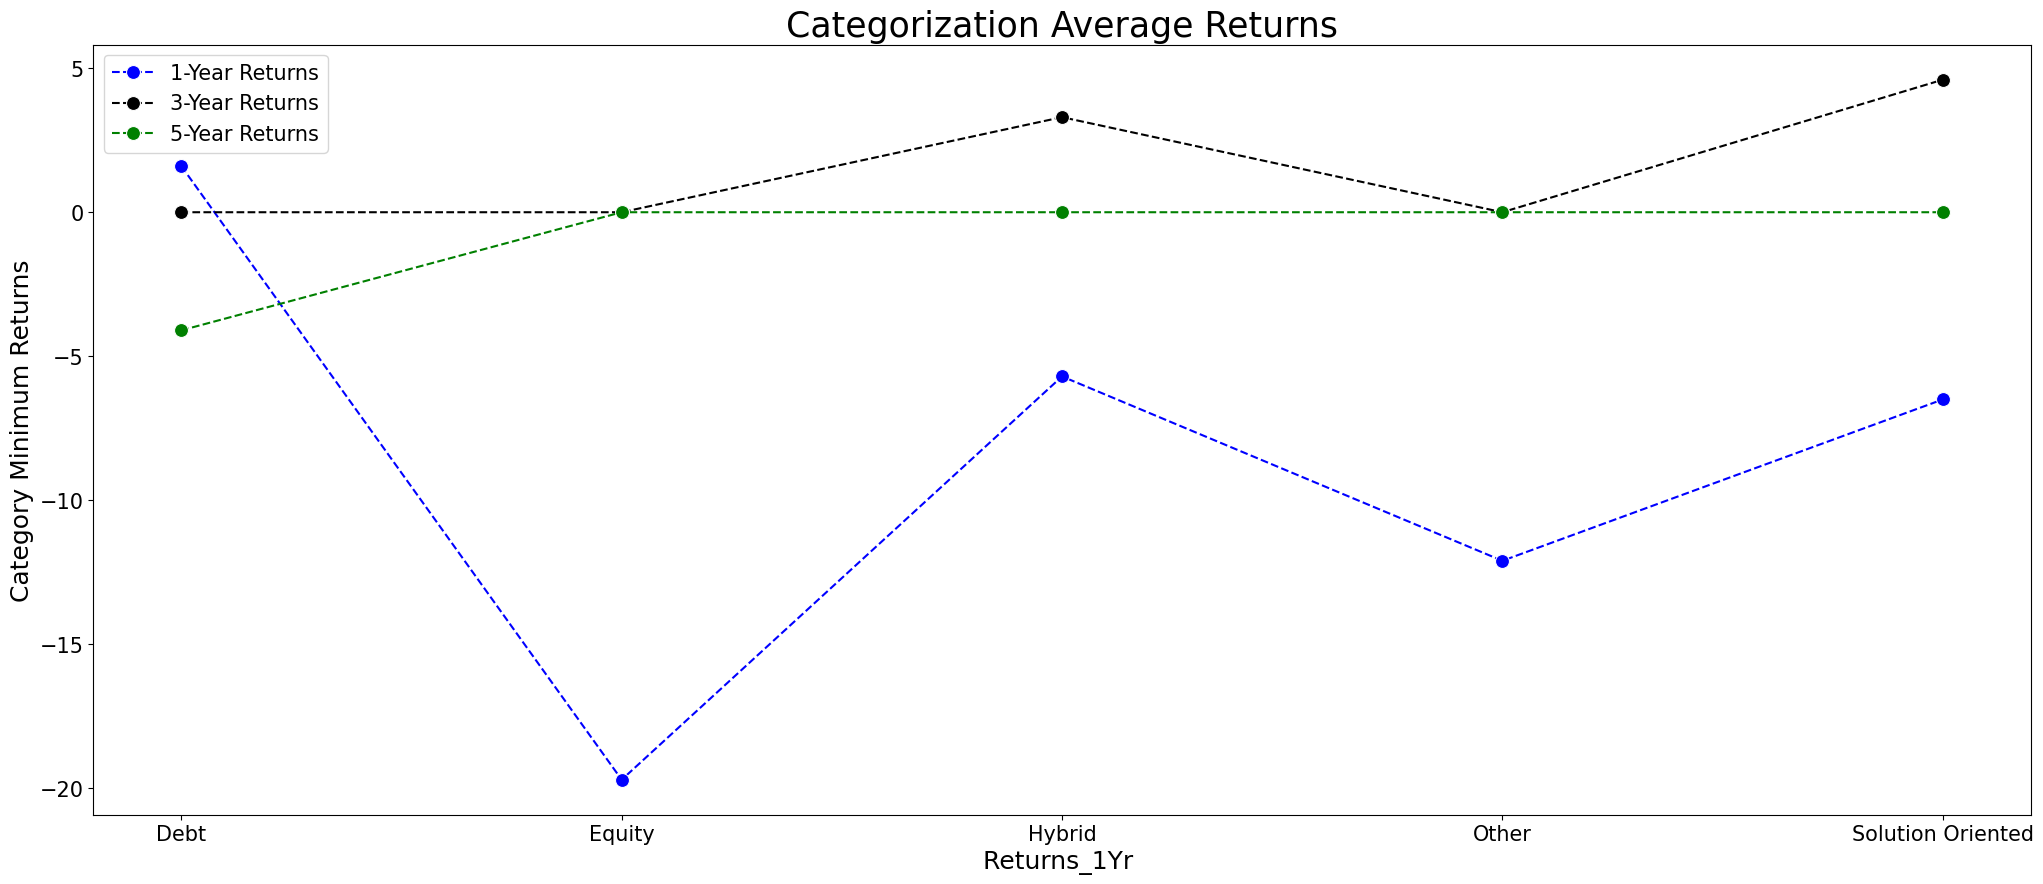

In [37]:
plt.figure(figsize=(25,10))
plt.title("Categorization Average Returns", fontsize=25)
plt.xlabel('Returns_1Yr ', fontsize=18)
plt.ylabel('Category Minimum Returns', fontsize=18)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)


sns.lineplot(x=min_year_1.index,y=min_year_1.values,label='1-Year Returns', color='b', marker='o', linestyle='--', markersize=10)
sns.lineplot(x=min_year_3.index,y=min_year_3.values,label='3-Year Returns', color='black', marker='o', linestyle='--', markersize=10)
sns.lineplot(x=min_year_5.index,y=min_year_5.values,label='5-Year Returns', color='g', marker='o', linestyle='--', markersize=10)


plt.legend(fontsize=15)

In [38]:
min_year_1df = df.groupby('Sub_Category')['Returns_1Yr'].min()
min_year_3df = df.groupby('Sub_Category')['Returns_3Yr'].min()
min_year_5df = df.groupby('Sub_Category')['Returns_5Yr'].min()

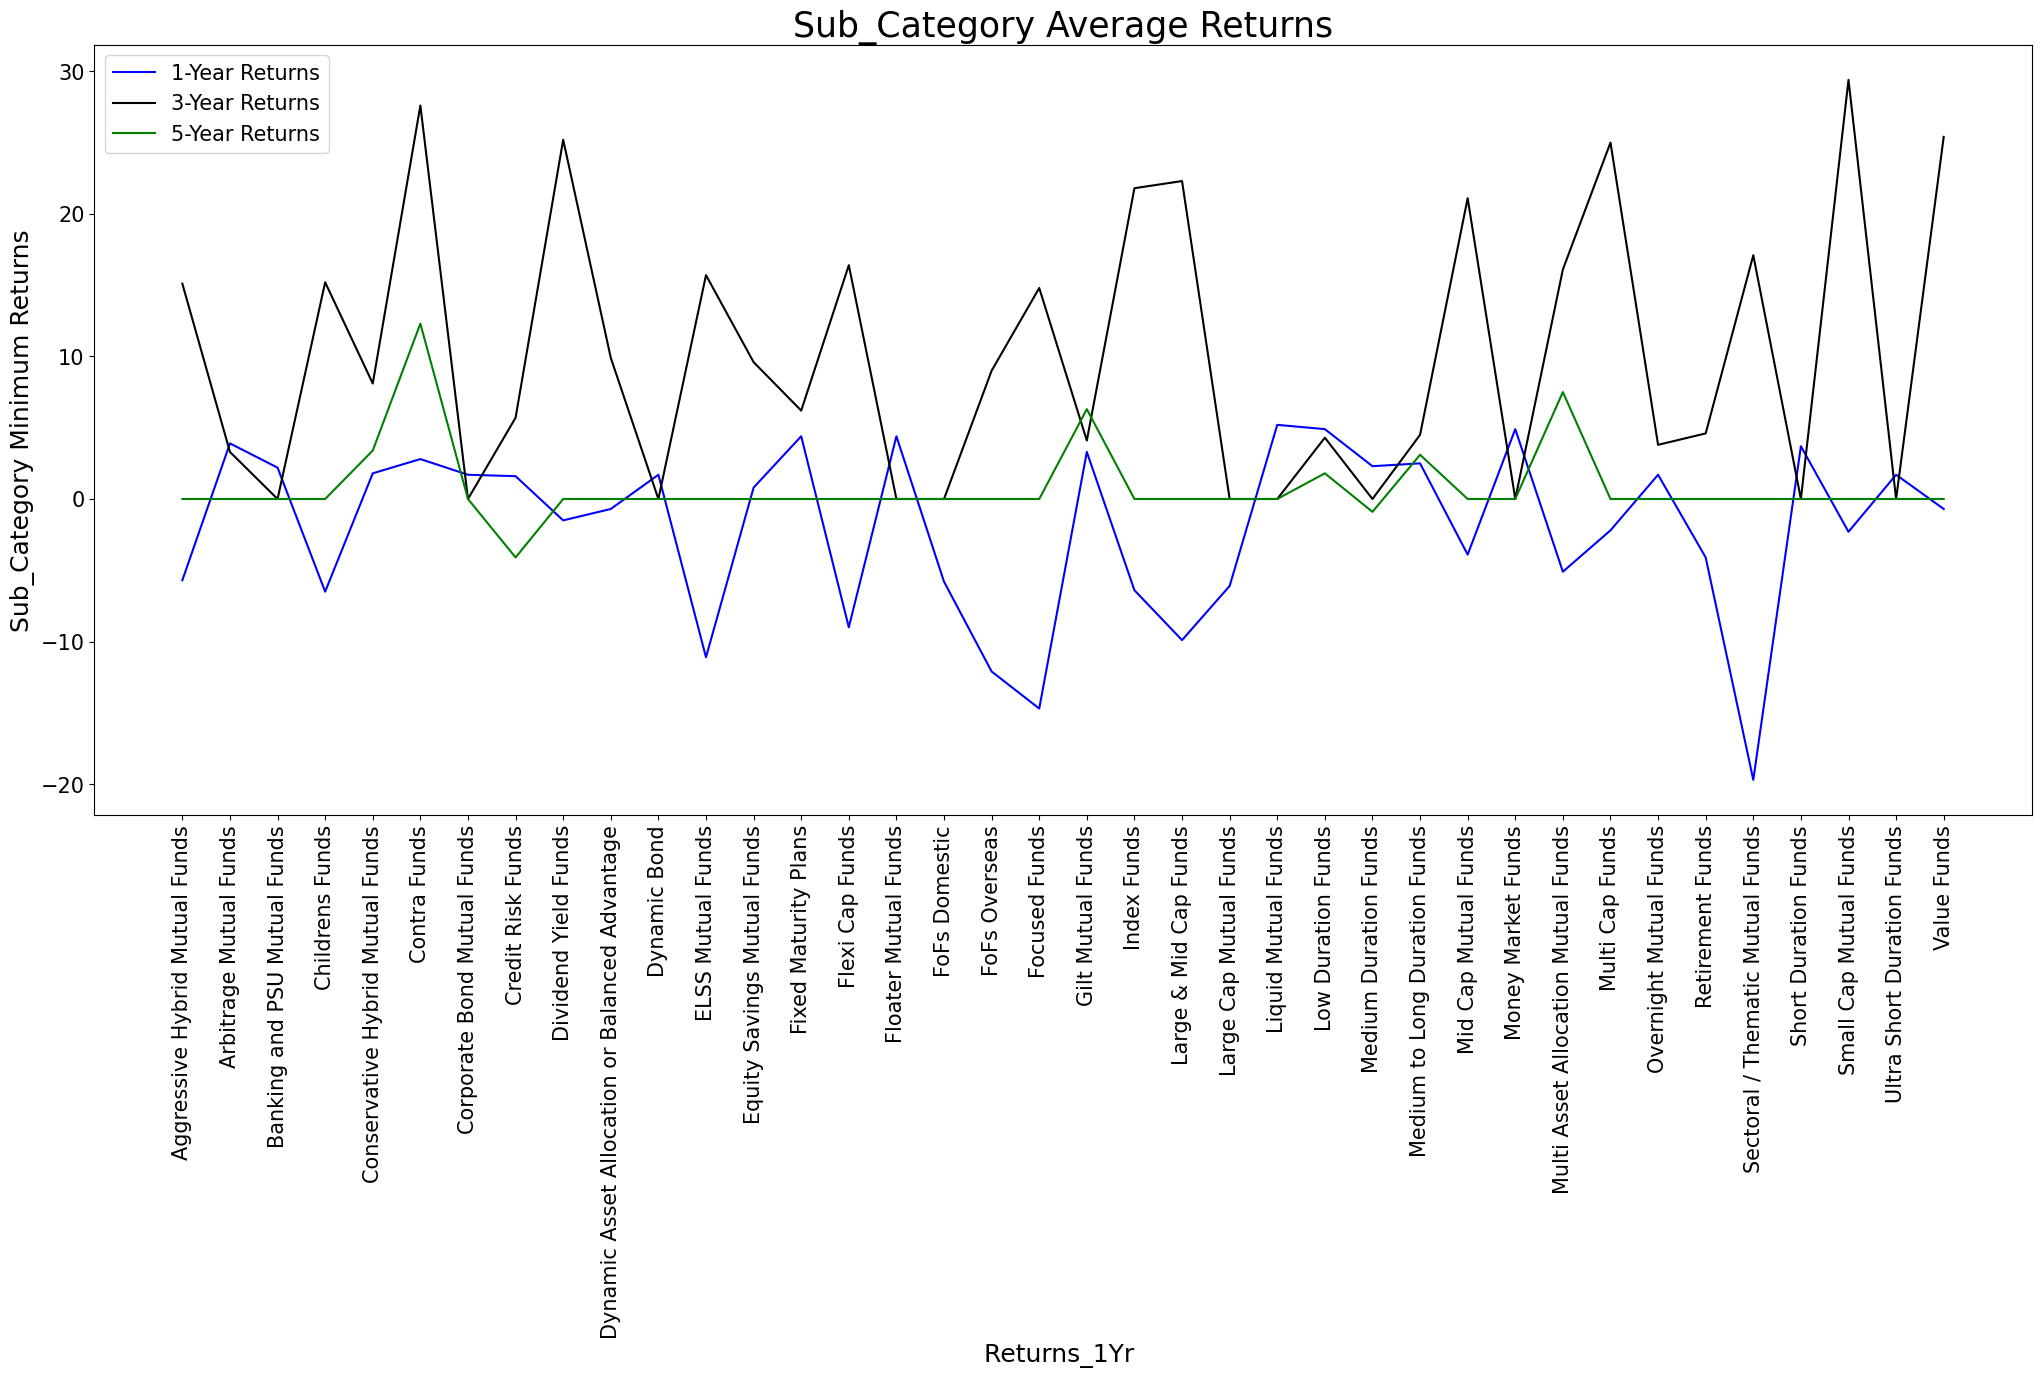

In [39]:
plt.figure(figsize=(25,10))
plt.title("Sub_Category Average Returns", fontsize=25)
plt.xlabel('Returns_1Yr ', fontsize=18)
plt.ylabel('Sub_Category Minimum Returns', fontsize=18)
plt.xticks( rotation=90, fontsize=15)
plt.yticks( fontsize=15)


sns.lineplot(x=min_year_1df.index,y=min_year_1df.values,label='1-Year Returns', color='b')
sns.lineplot(x=min_year_3df.index,y=min_year_3df.values,label='3-Year Returns', color='black')
sns.lineplot(x=min_year_5df.index,y=min_year_5df.values,label='5-Year Returns', color='g')


plt.legend(fontsize=15)

# Fund Performance Analysis

In [41]:

# Calculate the average returns for 1-year, 3-year, and 5-year
df['Average_Return_1Yr'] = (df['Returns_1Yr'] + 1).pow(1/1) - 1
df['Average_Return_3Yr'] = (df['Returns_3Yr'] + 1).pow(1/3) - 1
df['Average_Return_5Yr'] = (df['Returns_5Yr'] + 1).pow(1/5) - 1

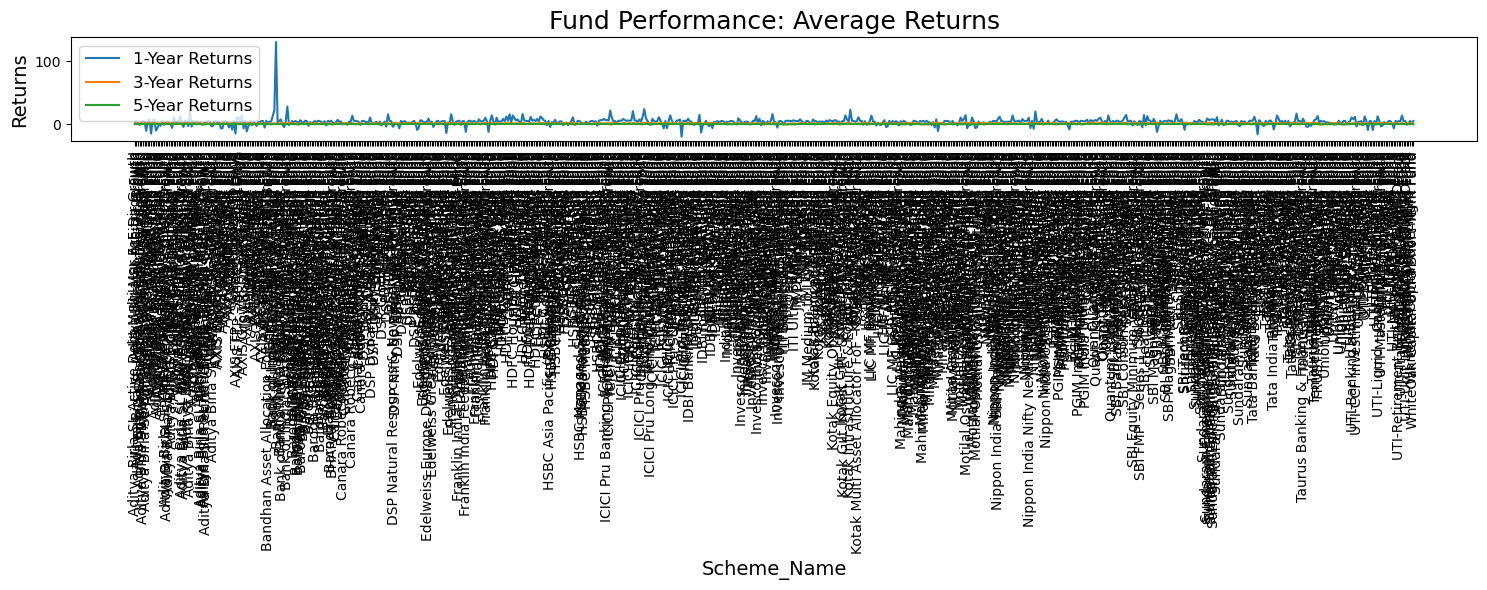

In [42]:
# Visualize the returns using line plots
plt.figure(figsize=(15, 6))
plt.title("Fund Performance: Average Returns", fontsize=18)
plt.xlabel('Scheme_Name', fontsize=14)
plt.ylabel('Returns', fontsize=14)

sns.lineplot(x=df['Scheme_Name'], y=df['Average_Return_1Yr'], label='1-Year Returns')
sns.lineplot(x=df['Scheme_Name'], y=df['Average_Return_3Yr'], label='3-Year Returns')
sns.lineplot(x=df['Scheme_Name'], y=df['Average_Return_5Yr'], label='5-Year Returns')

plt.xticks(rotation=90)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Identify the top-performing funds in each category and sub-category

In [45]:
top_performing_funds = df.groupby(['Category', 'Sub_Category']).apply(lambda x: x.nlargest(1, 'Average_Return_5Yr'))
top_performing_funds


Scheme_Name  \
Category          Sub_Category                                                                                            
Debt              Banking and PSU Mutual Funds                   182                  Edelweiss Banking & Psu Debt Fund   
                  Corporate Bond Mutual Funds                    267                           HSBC Corporate Bond Fund   
                  Credit Risk Funds                              306                         ICICI Pru Credit Risk Fund   
                  Dynamic Bond                                   275                               HSBC Flexi Debt Fund   
                  Fixed Maturity Plans                           63                    AXIS FTP – Series 104 – 1112Days   
                  Floater Mutual Funds                           313                   ICICI Pru Floating Interest Fund   
                  Gilt Mutual Funds                              157                                     DSP G-Sec Fund   
                  Liquid Mutual Funds                            605                  Quant Liquid Plan – Direct Growth   
                  Low Duration Funds                             32                   Aditya Birla SL Low Duration Fund   
                  Medium Duration Funds                          34    Aditya Birla SL Medium Term Plan – Direct Growth   
                  Medium to Long Duration Funds                  555                           Nippon India Income Fund   
                  Money Market Funds                             193                        Edelweiss Money Market Fund   
                  Overnight Mutual Funds                         812                    WhiteOak Capital Overnight Fund   
                  Short Duration Funds                           345                          ICICI Pru Short Term Fund   
                  Ultra Short Duration Funds                     538                         Navi Ultra Short Term Fund   
Equity            Contra Funds                                   623                                    SBI Contra Fund   
                  Dividend Yield Funds                           753                 Templeton India Equity Income Fund   
                  ELSS Mutual Funds                              609                      Quant Tax Plan- Direct Growth   
                  Flexi Cap Funds                                601                               Quant Flexi Cap Fund   
                  Focused Funds                                  371                           IIFL Focused Equity Fund   
                  Large & Mid Cap Funds                          501                 Mirae Asset Emerging Bluechip Fund   
                  Large Cap Mutual Funds                         126                 Canara Robeco Bluechip Equity Fund   
                  Mid Cap Mutual Funds                           606                                 Quant Mid Cap Fund   
                  Multi Cap Funds                                600                                  Quant Active Fund   
                  Sectoral / Thematic Mutual Funds               715                            Tata Digital India Fund   
                  Small Cap Mutual Funds                         608                               Quant Small Cap Fund   
                  Value Funds                                    351                     ICICI Pru Value Discovery Fund   
Hybrid            Aggressive Hybrid Mutual Funds                 599                                Quant Absolute Fund   
                  Arbitrage Mutual Funds                         180                           Edelweiss Arbitrage Fund   
                  Conservative Hybrid Mutual Funds               436                             Kotak Debt Hybrid Fund   
                  Dynamic Asset Allocation or Balanced Advantage 223                       HDFC Balanced Advantage Fund   
                  Equity Savings Mutual Funds    

# Expense Ratio Impact


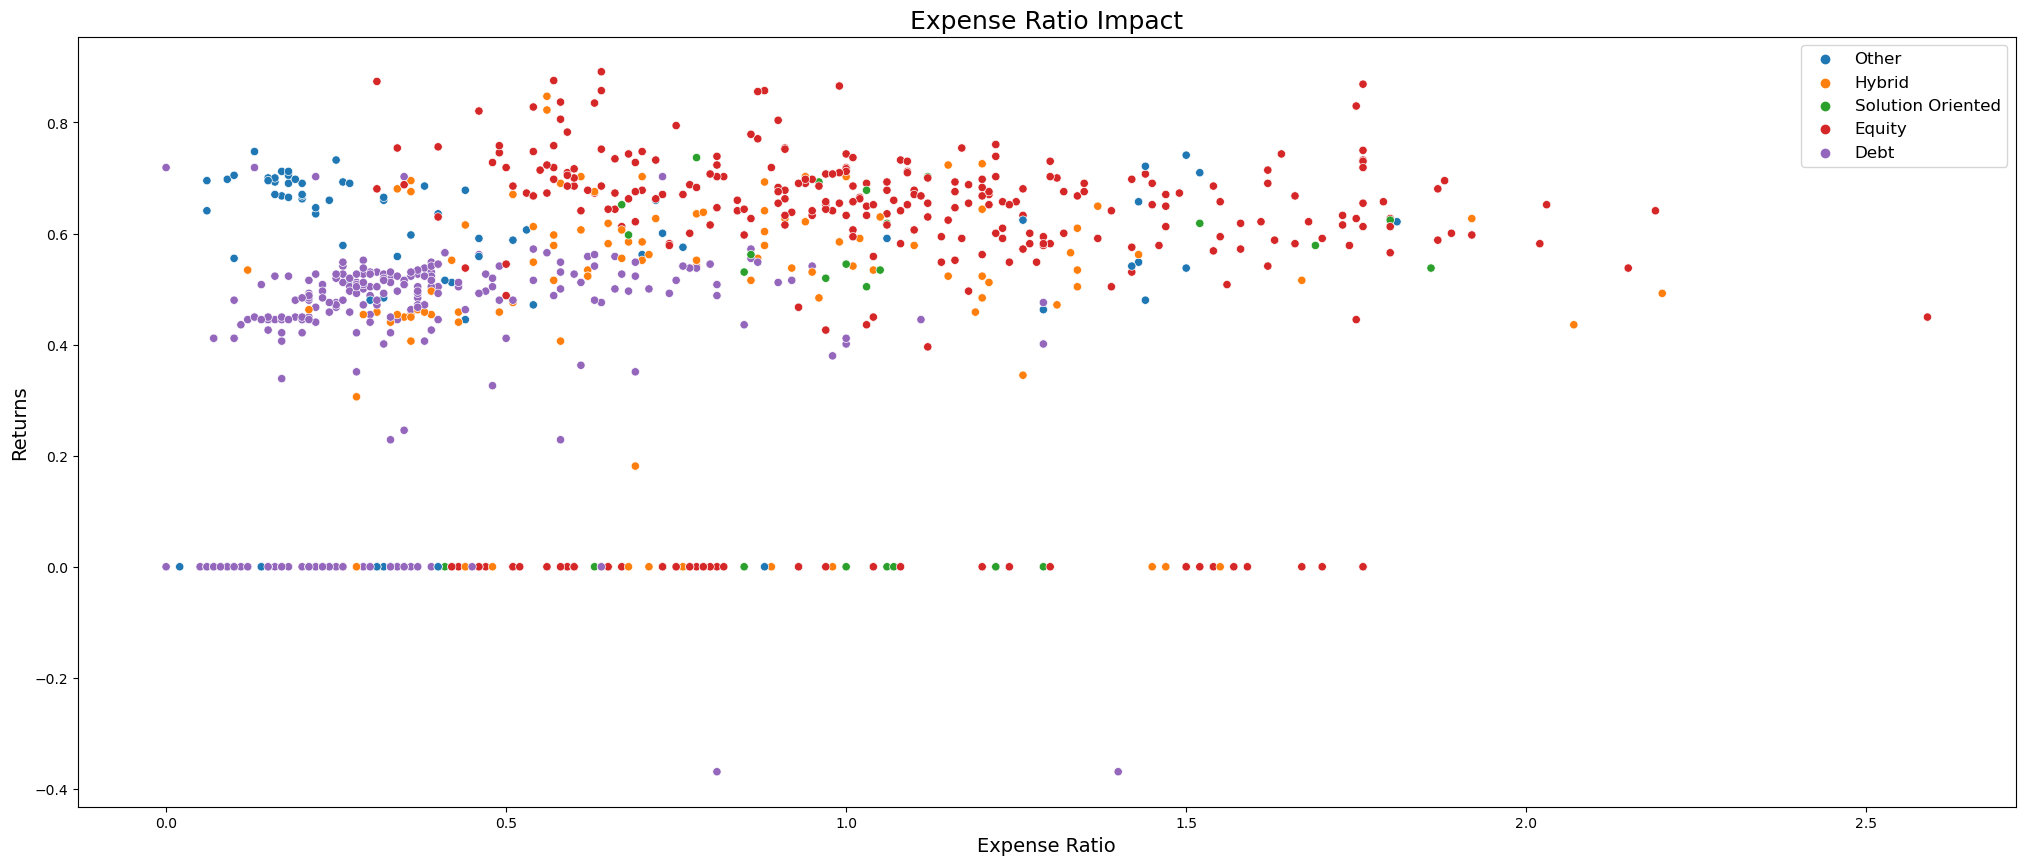

In [50]:
plt.figure(figsize=(25, 10))
plt.title("Expense Ratio Impact", fontsize=18)
plt.xlabel('Expense Ratio', fontsize=14)
plt.ylabel('Returns', fontsize=14)

sns.scatterplot(x='Expense_Ratio', y='Average_Return_5Yr', hue='Category', data=df)
plt.legend(fontsize=12)
plt.show()

# Fund Size and Age Analysis

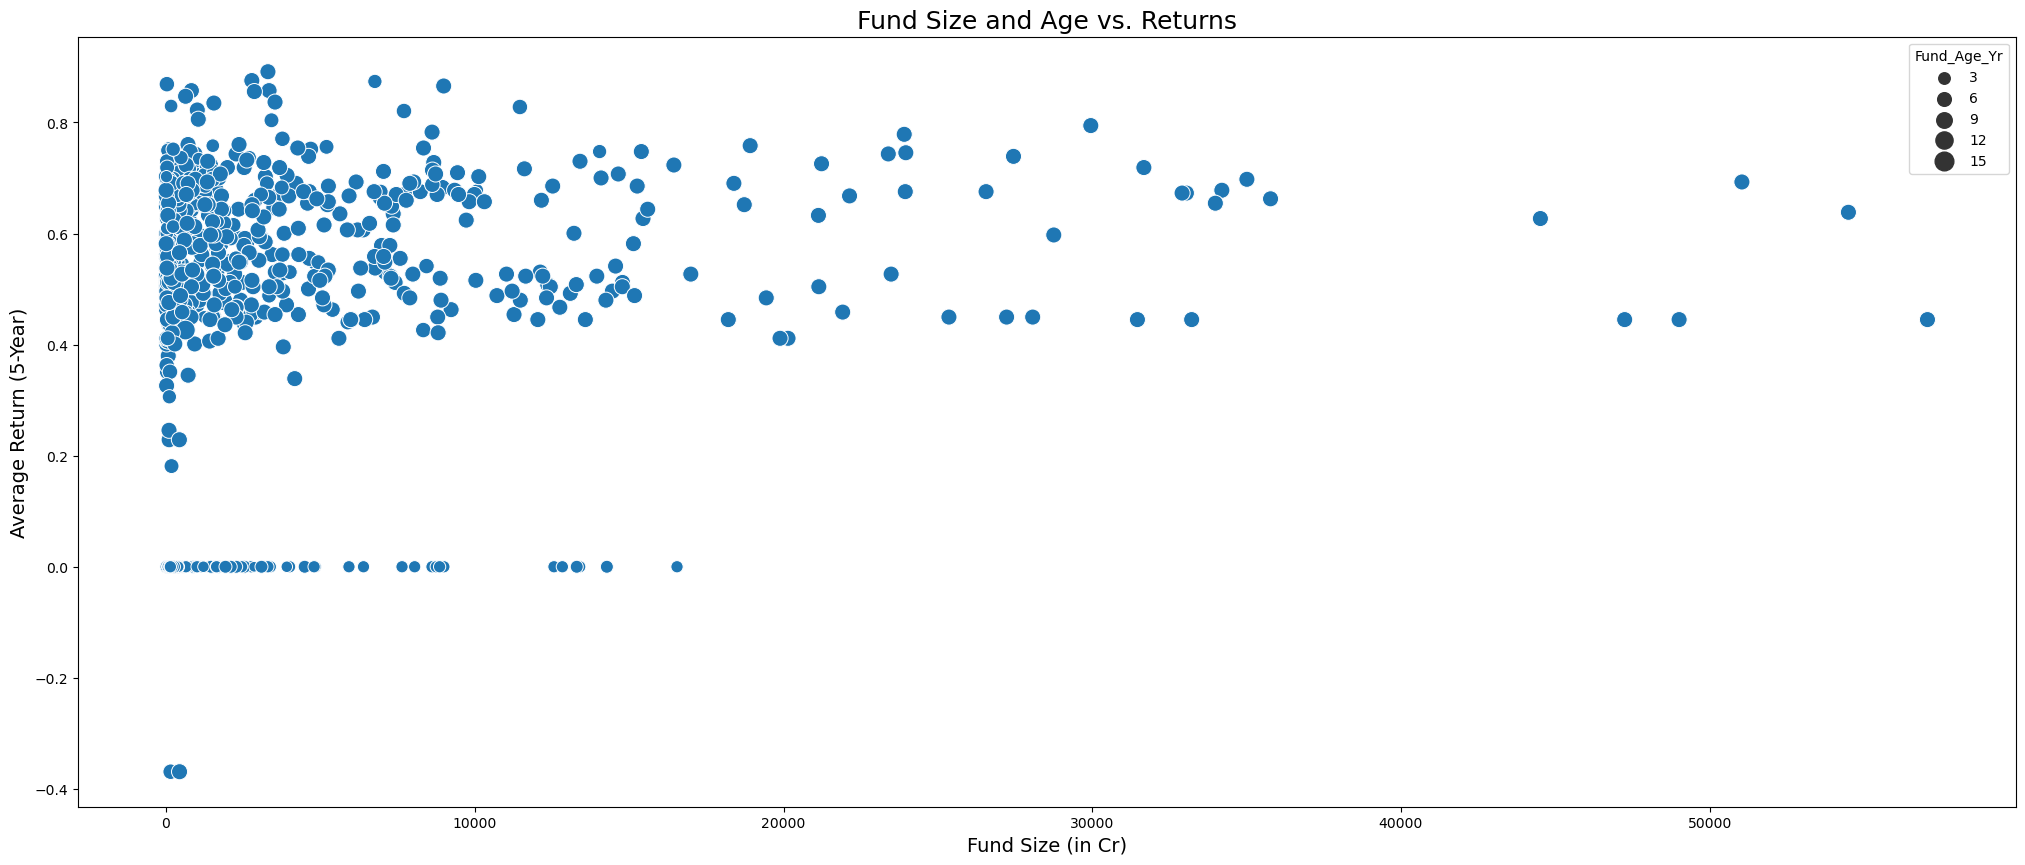

In [52]:

plt.figure(figsize=(25, 10))
plt.title("Fund Size and Age vs. Returns", fontsize=18)
plt.xlabel('Fund Size (in Cr)', fontsize=14)
plt.ylabel('Average Return (5-Year)', fontsize=14)

sns.scatterplot(x='Fund_Size_Cr', y='Average_Return_5Yr', size='Fund_Age_Yr', data=df, sizes=(50, 200))
plt.show()

# Fund Manager Impact

In [54]:
manager_returns = df.groupby('Fund_Manager')['Average_Return_5Yr'].mean()
manager_returns

Fund_Manager
Abhinav Khandelwal    0.244841
Abhinav Sharma        0.697633
Abhishek Bisen        0.596001
Abhishek Gupta        0.700034
Abhishek Iyer         0.222500
                        ...   
Vishal Thakker        0.000000
Vivek Ramakrishnan    0.213084
Vivek Sharma          0.530131
Vrijesh Kasera        0.000000
Yogesh Patil          0.643734
Name: Average_Return_5Yr, Length: 260, dtype: float64

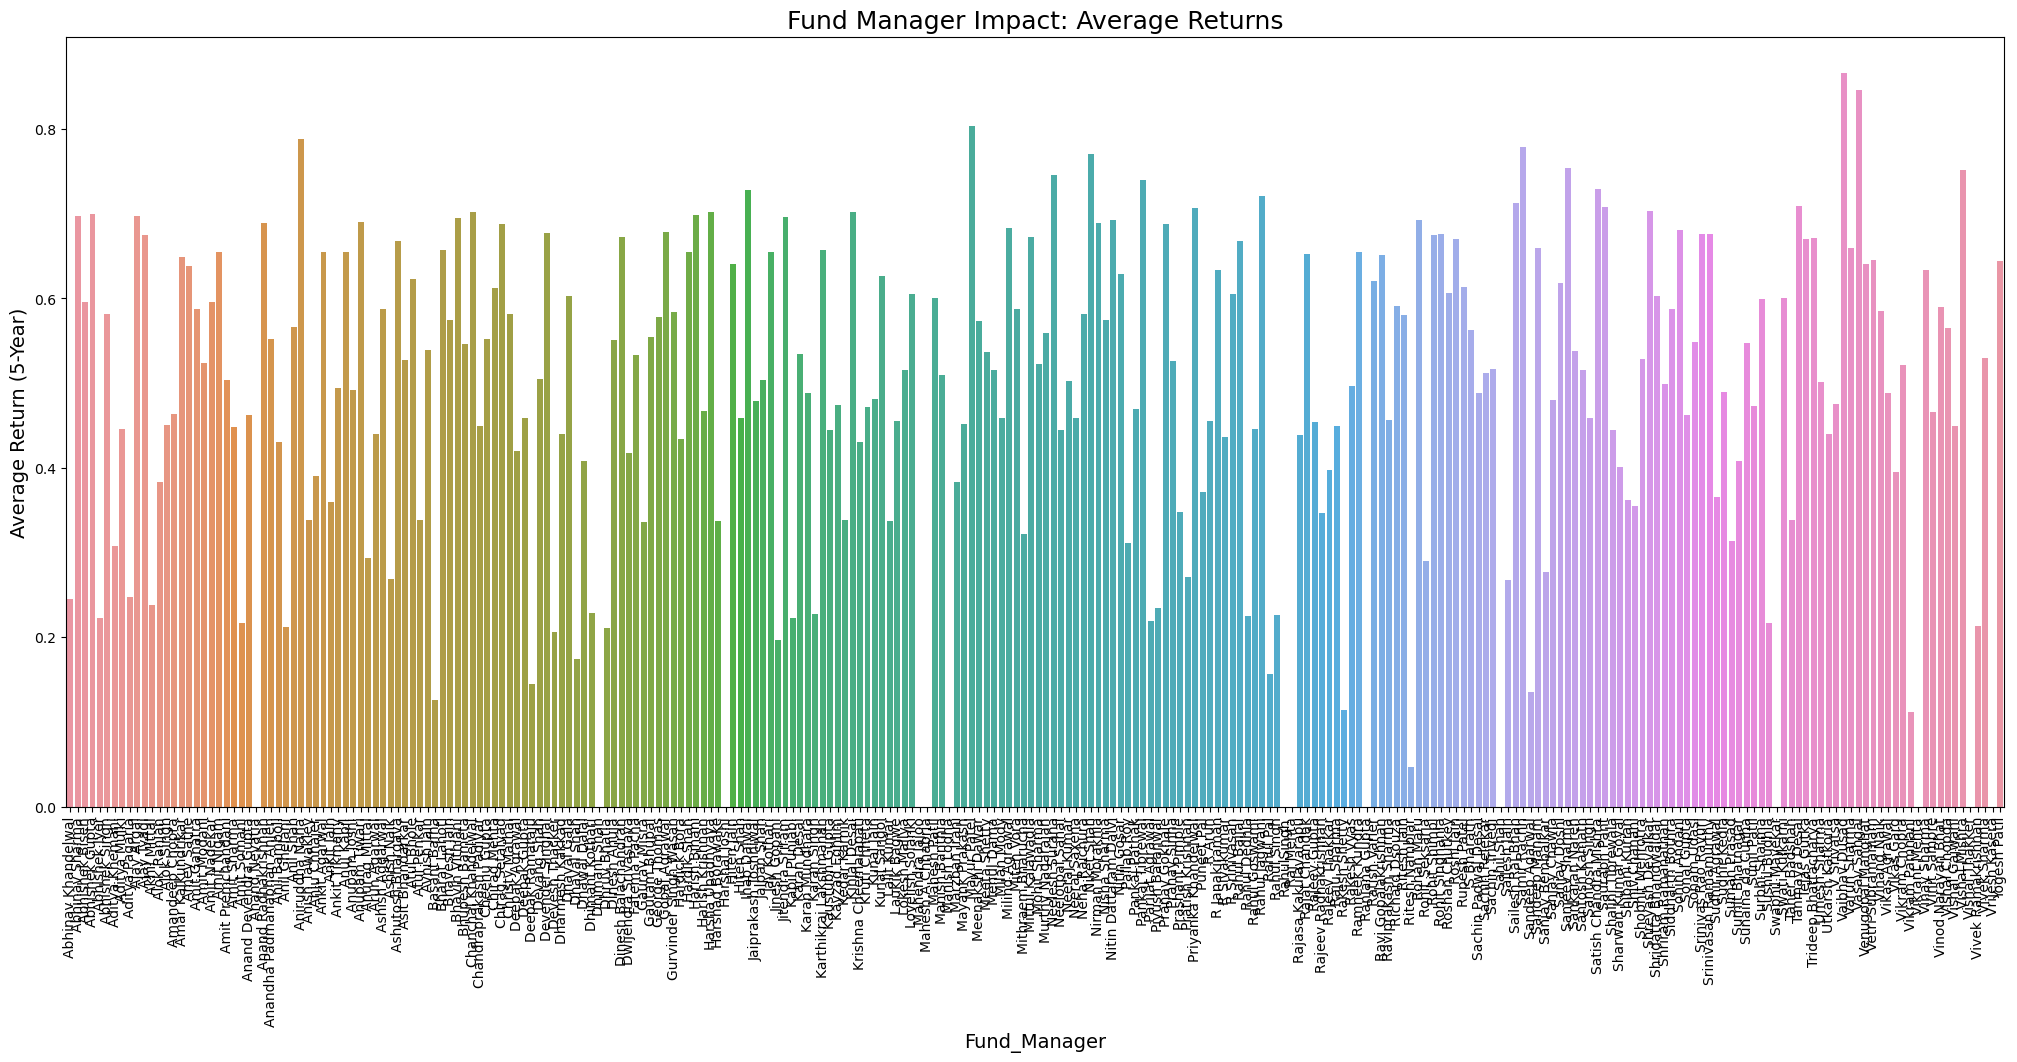

In [56]:

plt.figure(figsize=(25, 10))
plt.title("Fund Manager Impact: Average Returns", fontsize=18)
plt.xlabel('Fund Manager', fontsize=14)
plt.ylabel('Average Return (5-Year)', fontsize=14)

sns.barplot(x=manager_returns.index, y=manager_returns.values)
plt.xticks(rotation=90)
plt.show()

# AMC Comparison

In [58]:
amc_returns = df.groupby('Amc_Name')['Average_Return_5Yr'].mean()

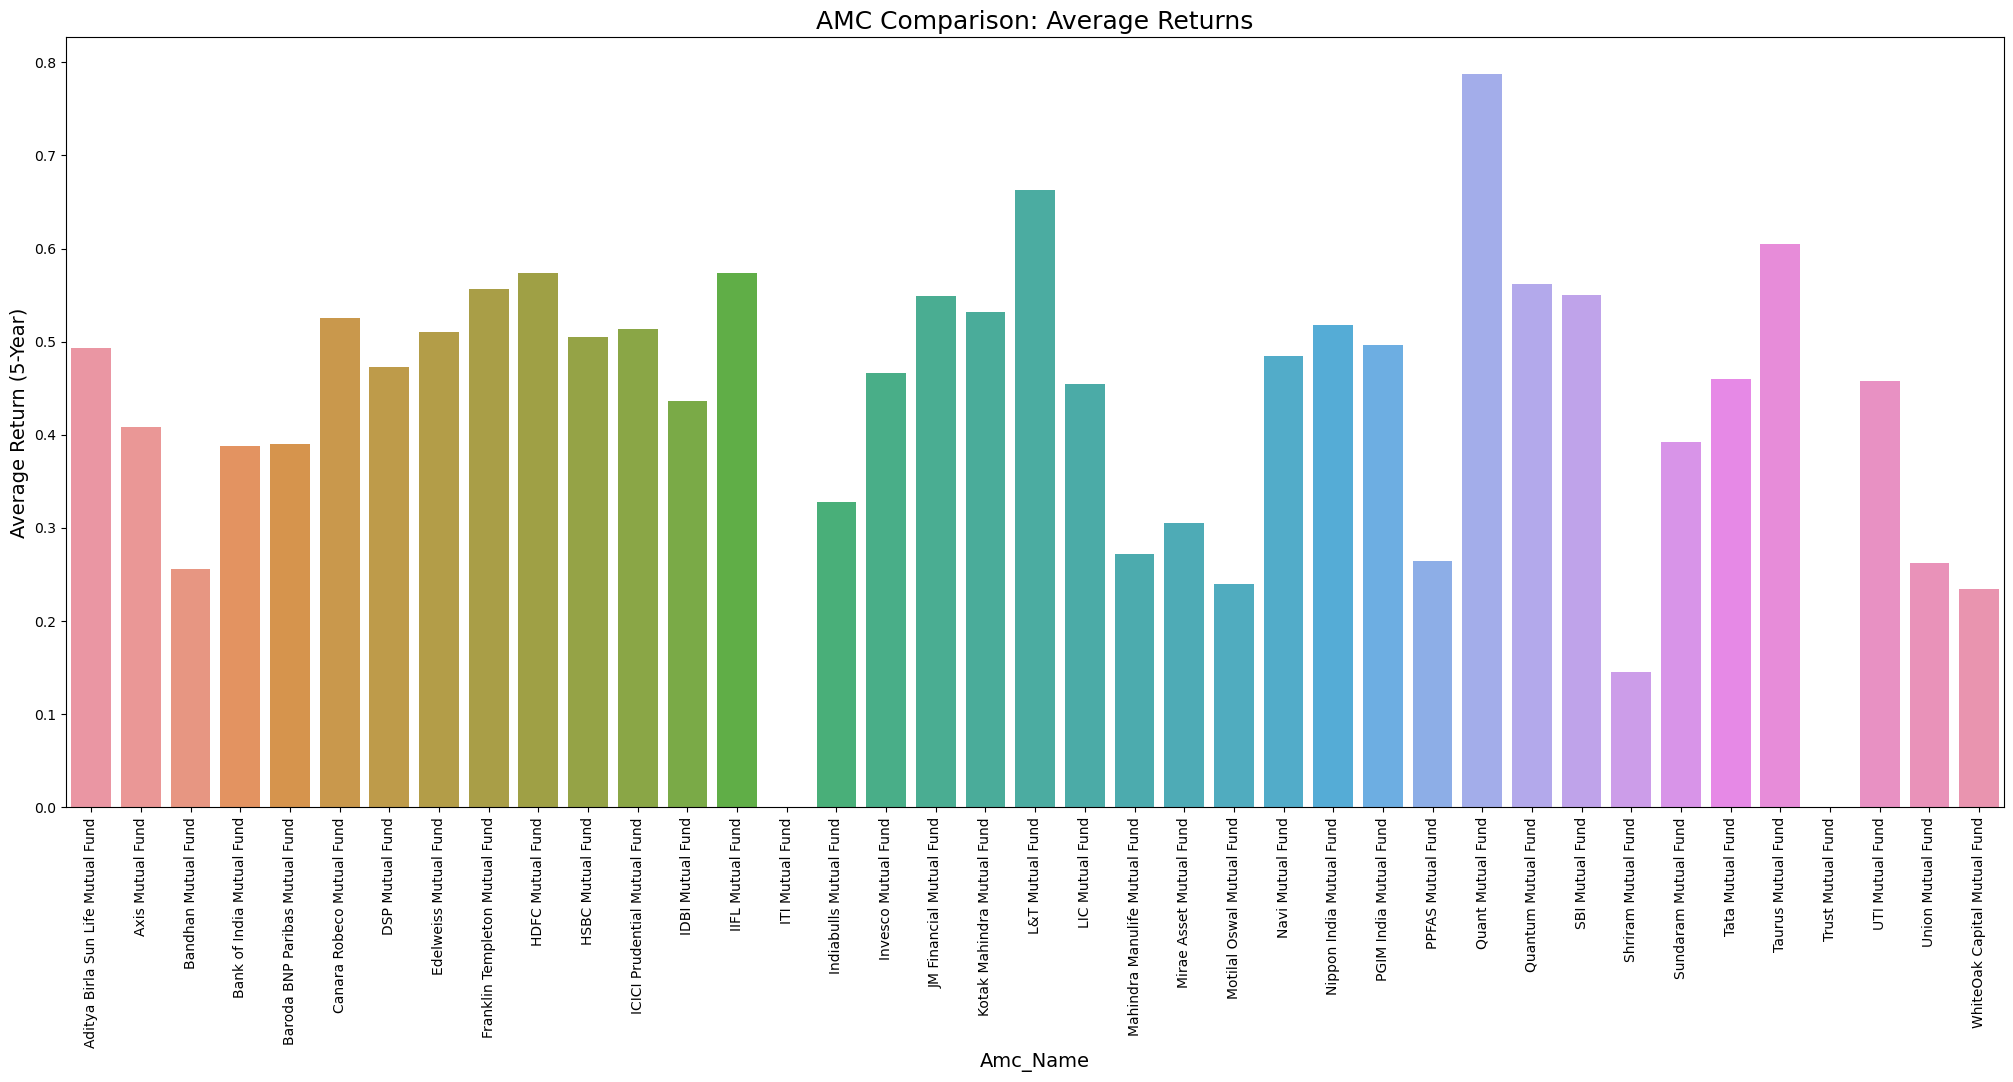

In [59]:

plt.figure(figsize=(25, 10))
plt.title("AMC Comparison: Average Returns", fontsize=18)
plt.xlabel('AMC Name', fontsize=14)
plt.ylabel('Average Return (5-Year)', fontsize=14)

sns.barplot(x=amc_returns.index, y=amc_returns.values)
plt.xticks(rotation=90)
plt.show()

# SIP vs. Lumpsum Analysis

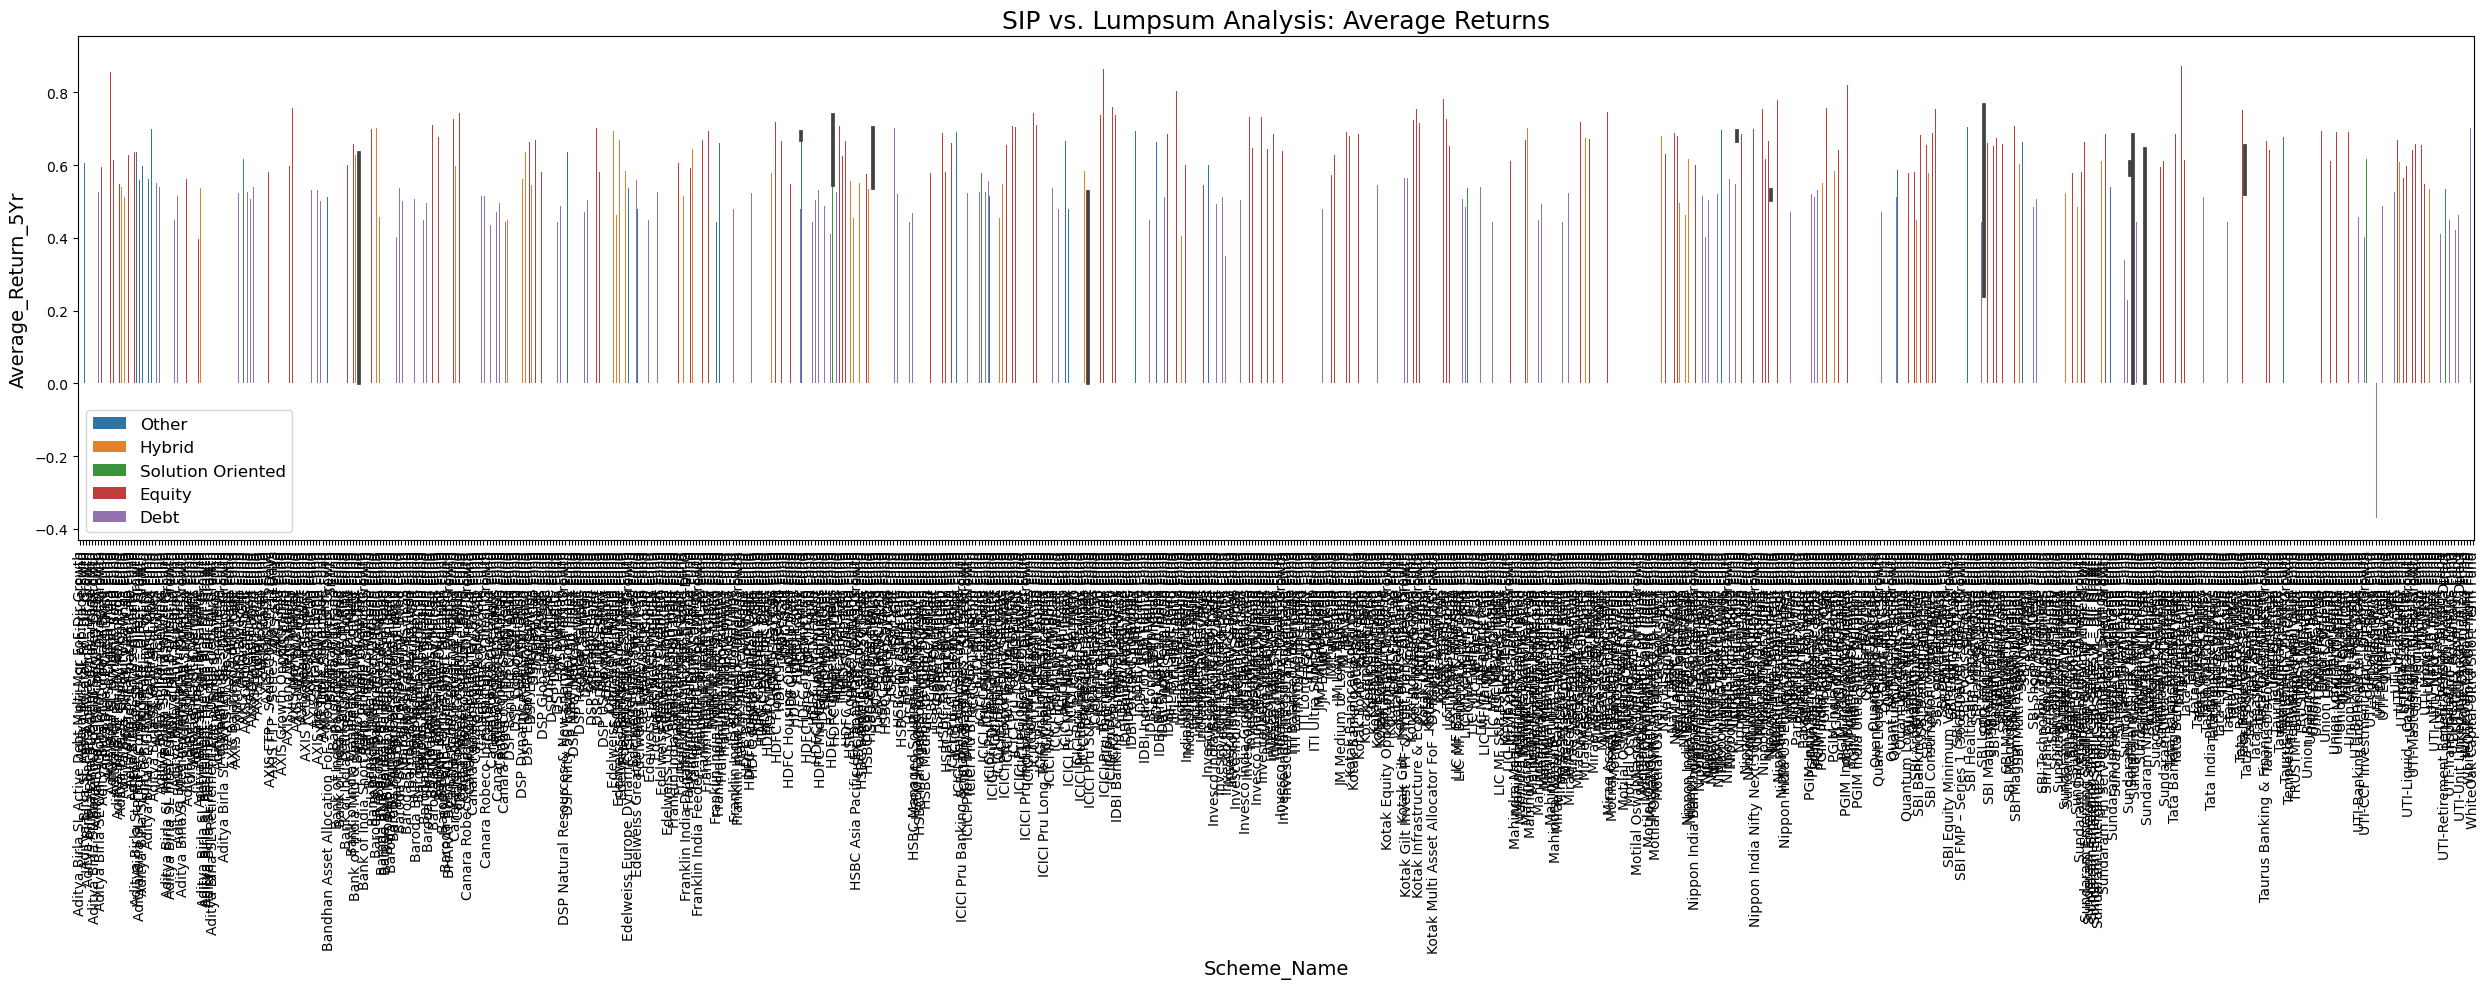

In [62]:

plt.figure(figsize=(25, 10))
plt.title("SIP vs. Lumpsum Analysis: Average Returns", fontsize=18)
plt.xlabel('Scheme_Name', fontsize=14)
plt.ylabel('Average Return (5-Year)', fontsize=14)

sns.barplot(x=df['Scheme_Name'], y=df['Average_Return_5Yr'], hue=df['Category'])
plt.xticks(rotation=90)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [63]:
df


Scheme_Name  Min_Sip  Min_Lumpsum  \
0    Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...      100          100   
1                       Aditya Birla SL Arbitrage Fund     1000         1000   
2       Aditya Birla SL Asset Allocator FoF-Dir Growth     1000         1000   
3     Aditya Birla SL Bal Bhavishya Yojna – Dir Growth      500         1000   
4              Aditya Birla SL Balanced Advantage Fund      100          100   
..                                                 ...      ...          ...   
809            UTI-Unit Linked Insurance Plan – Direct      500        15000   
810                       UTI-Value Opportunities Fund      500         5000   
811                       WhiteOak Capital Liquid Fund      500          500   
812                    WhiteOak Capital Overnight Fund      500          500   
813             WhiteOak Capital Ultra Short Term Fund      500          500   

     Expense_Ratio  Fund_Size_Cr  Fund_Age_Yr        Fund_Manager  Risk_Level  \
0             0.27          10.0           10      Kaustubh Gupta           3   
1             0.36        4288.0           10    Lovelish Solanki           1   
2             0.53         157.0           10  Vinod Narayan Bhat           5   
3             0.76         637.0            4         Atul Penkar           6   
4             0.61        6386.0           10        Mohit Sharma           6   
..             ...           ...          ...                 ...         ...   
809           0.96        5068.0           10     Amandeep Chopra           4   
810           1.16        6740.0           10   Vetri Subramaniam           6   
811           0.26         197.0            4     Piyush Baranwal           1   
812           0.22          14.0            4     Piyush Baranwal           1   
813           0.33         141.0            4     Piyush Baranwal           1   

                              Amc_Name  Rating           Category  \
0    Aditya Birla Sun Life Mutual Fund       3              Other   
1    Aditya Birla Sun Life Mutual Fund       3             Hybrid   
2    Aditya Birla Sun Life Mutual Fund       3              Other   
3    Aditya Birla Sun Life Mutual Fund       2  Solution Oriented   
4    Aditya Birla Sun Life Mutual Fund       4             Hybrid   
..                                 ...     ...                ...   
809                    UTI Mutual Fund       0             Hybrid   
810                    UTI Mutual Fund       4             Equity   
811       WhiteOak Capital Mutual Fund       1               Debt   
812       WhiteOak Capital Mutual Fund       1               Debt   
813       WhiteOak Capital Mutual Fund       2               Debt   

                                       Sub_Category  Returns_1Yr  Returns_3Yr  \
0                                     FoFs Domestic          4.0          6.5   
1                            Arbitrage Mutual Funds          5.6          4.8   
2                                     FoFs Domestic          2.0         18.9   
3                                   Childrens Funds         -0.7         17.1   
4    Dynamic Asset Allocation or Balanced Advantage          4.5         18.6   
..                                              ...          ...          ...   
809  Dynamic Asset Allocation or Balanced Advantage         -0.7         13.1   
810                                     Value Funds          1.7         27.2   
811                             Liquid Mutual Funds          5.3          3.8   
812                          Overnight Mutual Funds          1.7         32.4   
813                      Ultra Short Duration Funds          5.3          4.5   

     Returns_5Yr  Average_Return_1Yr  Average_Return_3Yr  Average_Return_5Yr  
0            6.9                 4.0            0.957434            0.511908  
1            5.5                 5.6            0.796702            0.454061  
2            9.7                 2.0            1.709886            0.

# Results:

# Fund Performance Analysis:

* The 5-year returns tend to be higher than 3-year returns, and both are generally higher than 1-year returns for most funds.
* Some funds have significantly higher returns than others, making them potential candidates for further investigation or investment.


# Expense Ratio Impact:

* There seems to be a slight negative correlation between expense ratio and returns. 
* Lower expense ratio funds have, on average, slightly better returns compared to funds with higher expense ratios.

# Fund Size and Age Analysis:

* There is no obvious correlation between fund size (in Crores) or fund age (in years) and the returns. 
* Funds of different sizes and ages exhibit a wide range of returns.

# Categorization Analysis:

* Equity funds generally show higher returns compared to Debt and Hybrid funds.
* Among sub-categories, Small Cap Mutual Funds and Medium Duration Funds have shown some of the best returns.

# Fund Manager Impact:

* Different fund managers have varying impacts on fund performance.
* Some fund managers consistently manage funds with high returns, while others have more modest performance.

# AMC Comparison:

* Different AMCs have different average returns across their funds, indicating varying levels of expertise and performance among AMC houses.
* Some AMCs have more top-performing funds across categories, potentially suggesting better overall fund management.

# SIP vs. Lumpsum Analysis:

* There is no significant difference between the average returns of funds invested via SIP or Lumpsum, suggesting that both investment methods have similar outcomes in the given dataset.